# Box-plots

Building box plots for the two groups, differentiating shared parameters.


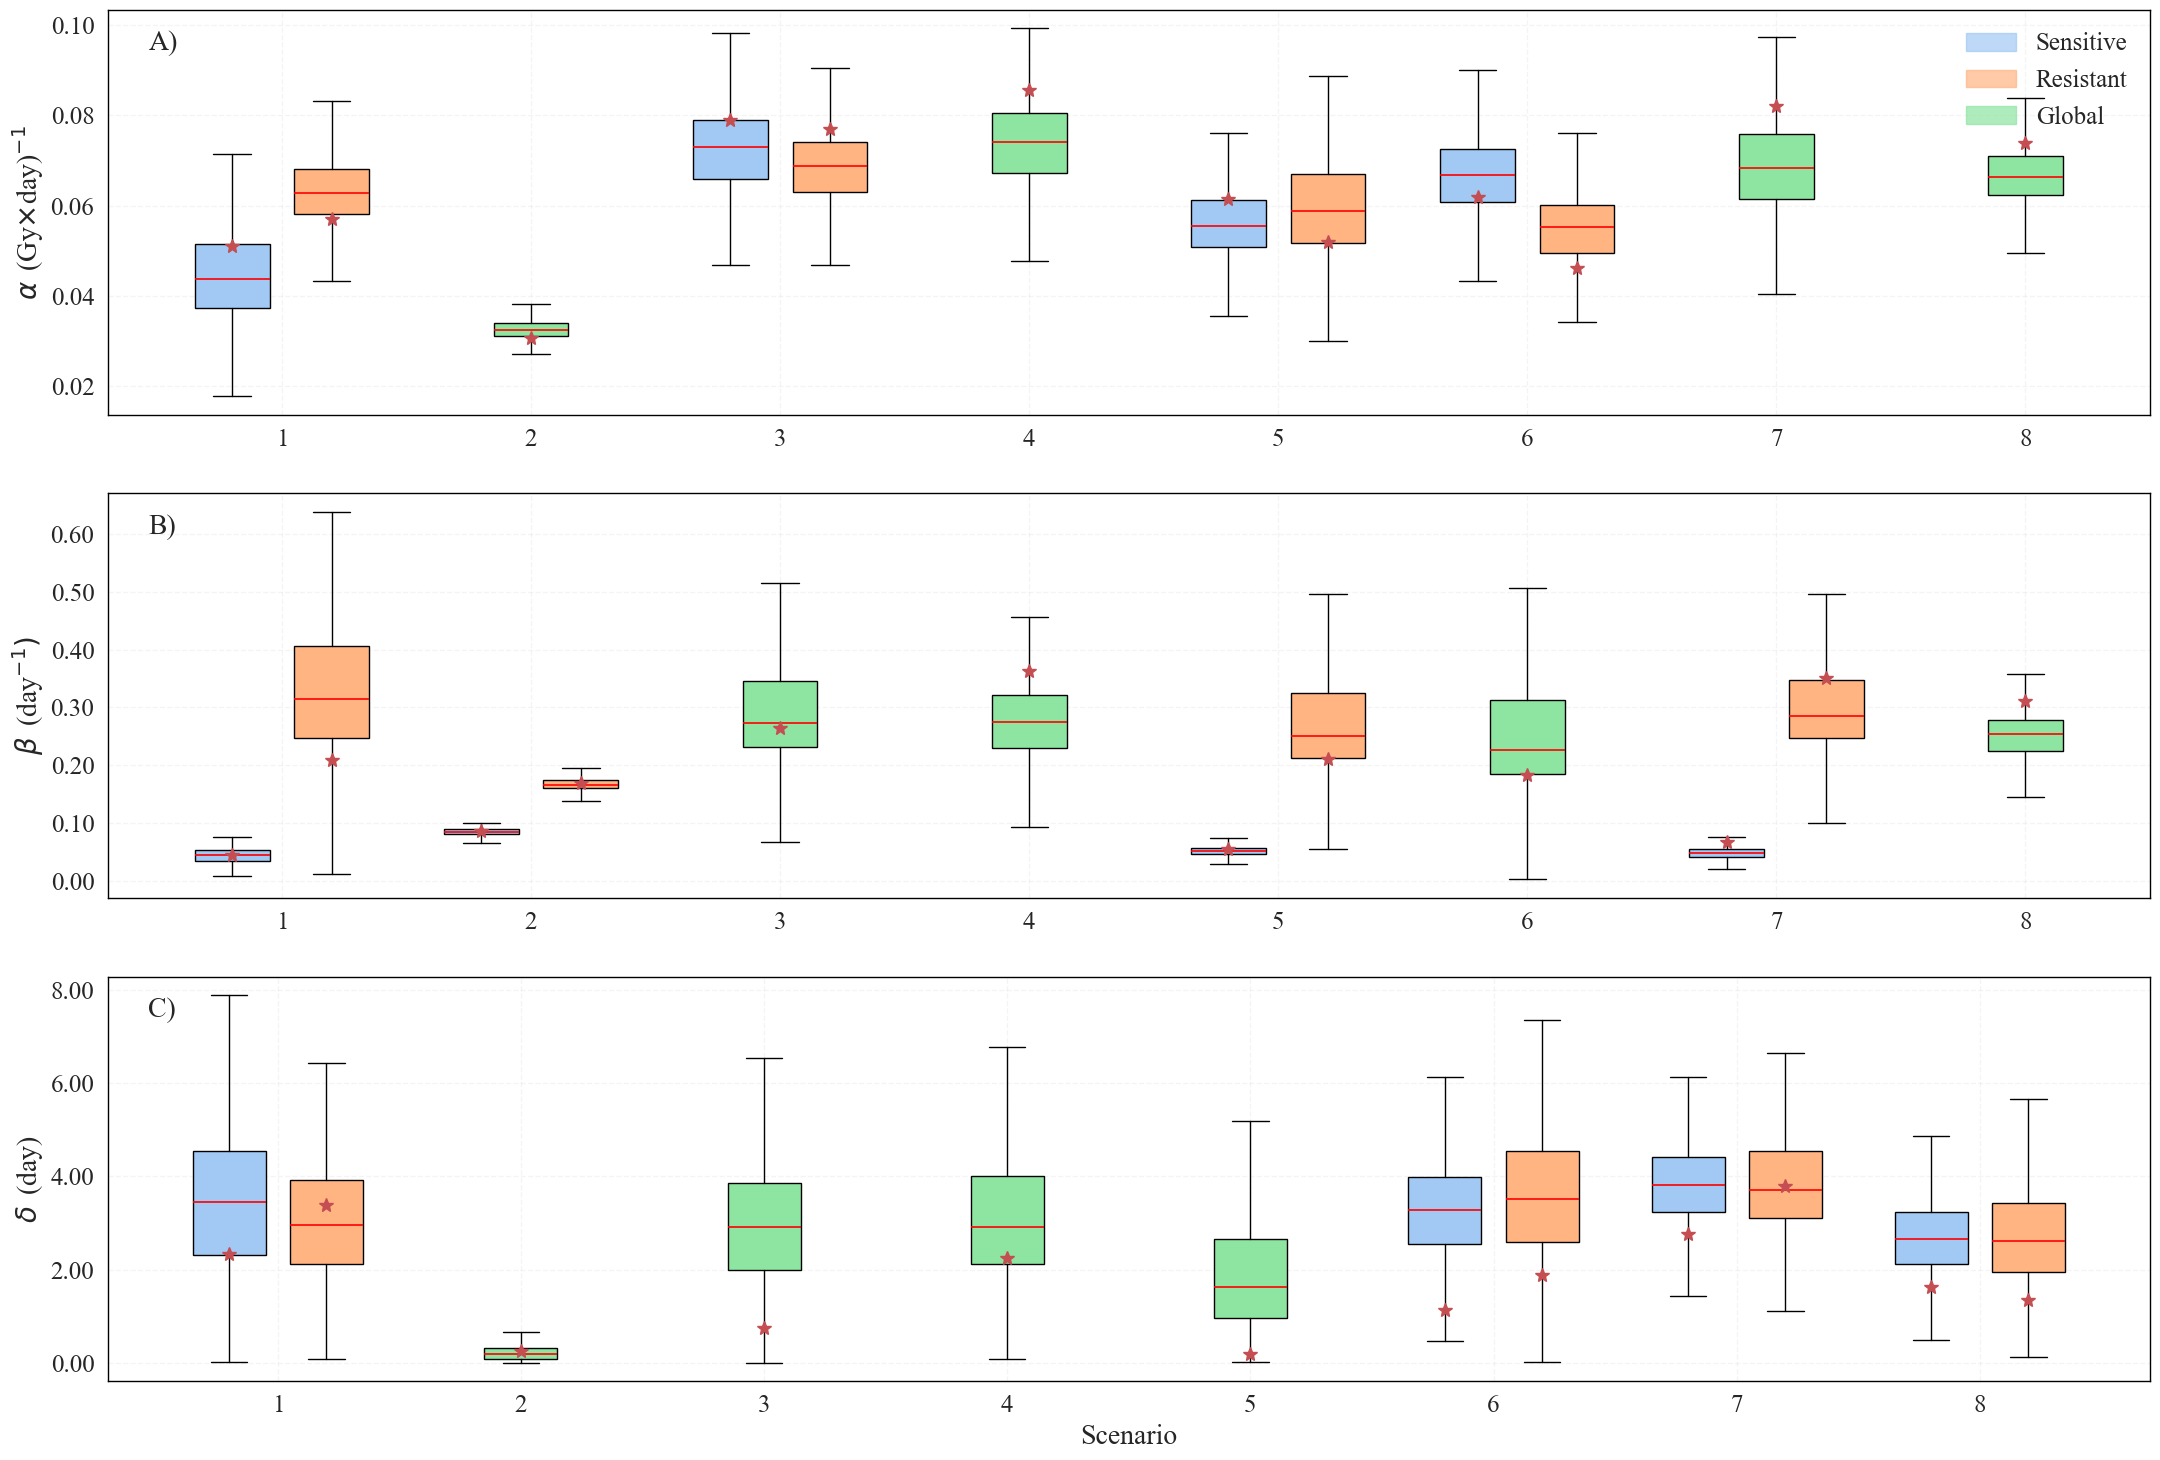

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
import string
from matplotlib.ticker import FuncFormatter

def read_chains(chain_files):
    chains = []
    for cf in chain_files:
        chains.append(np.loadtxt(cf))
    return chains

def read_best_params(best_params_files):
    best_params = []
    for bf in best_params_files:
        npzfile = np.load(bf)
        best_params.append(npzfile['pars'])
    return best_params

chain_files_sensitive = [
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV1.gz',
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV2.gz',
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV3.gz',
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV4.gz',
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV5.gz',
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV6.gz',
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV7.gz',
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV8.gz'
]

best_params_files_sensitive = [
    './Output_Calibration/multi_ll_pars_radiation_sensitive_ExponentialDecayDelayV1.npz',       
    './Output_Calibration/multi_ll_pars_radiation_sensitive_ExponentialDecayDelayV2.npz',
    './Output_Calibration/multi_ll_pars_radiation_sensitive_ExponentialDecayDelayV3.npz',       
    './Output_Calibration/multi_ll_pars_radiation_sensitive_ExponentialDecayDelayV4.npz',
    './Output_Calibration/multi_ll_pars_radiation_sensitive_ExponentialDecayDelayV5.npz',       
    './Output_Calibration/multi_ll_pars_radiation_sensitive_ExponentialDecayDelayV6.npz',
    './Output_Calibration/multi_ll_pars_radiation_sensitive_ExponentialDecayDelayV7.npz',     
    './Output_Calibration/multi_ll_pars_radiation_sensitive_ExponentialDecayDelayV8.npz'
]

chain_files_resistant = [
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV1.gz',
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz',
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV3.gz',
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV4.gz',
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV5.gz',
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV6.gz',
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV7.gz',
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV8.gz'
]

best_params_files_resistant = [
    './Output_Calibration/multi_ll_pars_radiation_resistant_ExponentialDecayDelayV1.npz',        
    './Output_Calibration/multi_ll_pars_radiation_resistant_ExponentialDecayDelayV2.npz',
    './Output_Calibration/multi_ll_pars_radiation_resistant_ExponentialDecayDelayV3.npz',        
    './Output_Calibration/multi_ll_pars_radiation_resistant_ExponentialDecayDelayV4.npz',
    './Output_Calibration/multi_ll_pars_radiation_resistant_ExponentialDecayDelayV5.npz',        
    './Output_Calibration/multi_ll_pars_radiation_resistant_ExponentialDecayDelayV6.npz',
    './Output_Calibration/multi_ll_pars_radiation_resistant_ExponentialDecayDelayV7.npz',        
    './Output_Calibration/multi_ll_pars_radiation_resistant_ExponentialDecayDelayV8.npz'
]

chains_sens = read_chains(chain_files_sensitive)
best_sens = read_best_params(best_params_files_sensitive)
chains_res = read_chains(chain_files_resistant)
best_res = read_best_params(best_params_files_resistant)

def plot_boxplots_shared_or_not_radiotherapy(
    chains_sens,
    best_sens,
    chains_res,
    best_res,
    parameter_labels,
    shared_params_dict,
    model_extension='_ExponentialDecayDelay',
    nCols=1,
    show=True,
    save=False,
    figure_name='boxplots_two_groups_radiotherapy'
):
    print("Building box plots for the two groups, differentiating shared parameters.")

    sns.set(style="whitegrid")
    colors = sns.color_palette("pastel")
    medianprops = dict(color="red", linewidth=1.2)
    flierprops = dict(marker='o', color='orange', alpha=0.6, markersize=10)

    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif']  = ['Times New Roman']
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['axes.linewidth'] = 1.0

    n_params = len(parameter_labels)
    nRows = int(np.ceil(n_params / nCols))
    fig, axes = plt.subplots(nrows=nRows, ncols=nCols, figsize=(22, 15), sharex=False)
    axes = np.array(axes).ravel() if n_params > 1 else [axes]

    y_labels = [
        r'$\alpha\,$ (Gy$\times$day)$^{-1}$',
        r'$\beta\,$ (day$^{-1})$',
        r'$\delta\,$ (day)'
    ]

    for param_idx, label in enumerate(parameter_labels):
        ax = axes[param_idx]
        for scenario in range(1, 9):
            if label in shared_params_dict[scenario]:
                data_shared = chains_sens[scenario - 1][:, param_idx]
                box = ax.boxplot([data_shared],
                                 positions=[scenario],
                                 widths=0.3,
                                 patch_artist=True,
                                 showfliers=False,
                                 medianprops=medianprops,
                                 flierprops=flierprops)
                box['boxes'][0].set_facecolor(colors[2])  # Verde pastel
                y_shared = best_sens[scenario - 1][param_idx]
                ax.plot(scenario, y_shared, 'r*', markersize=10, zorder=5)
            else:
                data_sens = chains_sens[scenario - 1][:, param_idx]
                data_res = chains_res[scenario - 1][:, param_idx]
                pos_sens, pos_res = scenario - 0.2, scenario + 0.2
                box_sens = ax.boxplot([data_sens],
                                      positions=[pos_sens],
                                      widths=0.3,
                                      patch_artist=True,
                                      showfliers=False,
                                      medianprops=medianprops,
                                      flierprops=flierprops)
                for patch in box_sens['boxes']:
                    patch.set_facecolor(colors[0])  # Azul pastel
                box_res = ax.boxplot([data_res],
                                     positions=[pos_res],
                                     widths=0.3,
                                     patch_artist=True,
                                     showfliers=False,
                                     medianprops=medianprops,
                                     flierprops=flierprops)
                for patch in box_res['boxes']:
                    patch.set_facecolor(colors[1])  # Amarelo pastel
                y_sens = best_sens[scenario - 1][param_idx]
                y_res = best_res[scenario - 1][param_idx]
                ax.plot(pos_sens, y_sens, 'r*', markersize=10, zorder=5)
                ax.plot(pos_res, y_res, 'r*', markersize=10, zorder=5)

        ax.text(0.02, .9, f'{string.ascii_uppercase[param_idx]})', transform=ax.transAxes, fontsize=20)

        if param_idx == n_params - 1:
            ax.set_xlabel("Scenario", fontsize=20)
        else:   
            ax.set_xlabel("") 

        ax.set_ylabel(y_labels[param_idx], fontsize=20)
        ax.set_xticks(range(1, 9))
        ax.set_xticklabels(range(1, 9), fontsize=18)
        ax.tick_params(axis='y', which='major', labelsize=18)
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))
        ax.grid(True, linestyle='--', alpha=0.2)
        for spine in ax.spines.values():
            spine.set_color('black')
            spine.set_linewidth(1.0)

    sens_patch = mpatches.Patch(color=colors[0], alpha=0.7, label='Sensitive')
    res_patch = mpatches.Patch(color=colors[1], alpha=0.7, label='Resistant')
    global_patch = mpatches.Patch(color=colors[2], alpha=0.7, label='Global')
    axes[0].legend(handles=[sens_patch, res_patch, global_patch], loc=1, fontsize=18, frameon=False)

    for i in range(n_params, nRows * nCols):
        fig.delaxes(axes[i])

    plt.tight_layout(h_pad=1.5)
    if save:
        plt.savefig(f'{figure_name}{model_extension}.png', dpi=300, bbox_inches='tight', pad_inches=0.02)
    if show:
        plt.show()
    else:
        plt.close()

parameter_labels = [r'$\alpha$', r'$\beta$', r'$\delta$']

shared_params_dict = {
    1: [],                        
    2: [r'$\alpha$', r'$\delta$'],         
    3: [r'$\beta$', r'$\delta$'],          
    4: [r'$\alpha$', r'$\beta$', r'$\delta$'],   
    5: [r'$\delta$'],                   
    6: [r'$\beta$'],                   
    7: [r'$\alpha$'],                  
    8: [r'$\alpha$', r'$\beta$']           
}

plot_boxplots_shared_or_not_radiotherapy(chains_sens, best_sens,
                             chains_res, best_res,
                             parameter_labels,
                             shared_params_dict,
                             model_extension='_ExponentialDecayDelay',
                             nCols=1,
                             show=True,
                             save=False,
                             figure_name='box-plots')

# Parameters Distributions

Processing distributions for the group: radiation_resistant
Reading the chains file: ./Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz


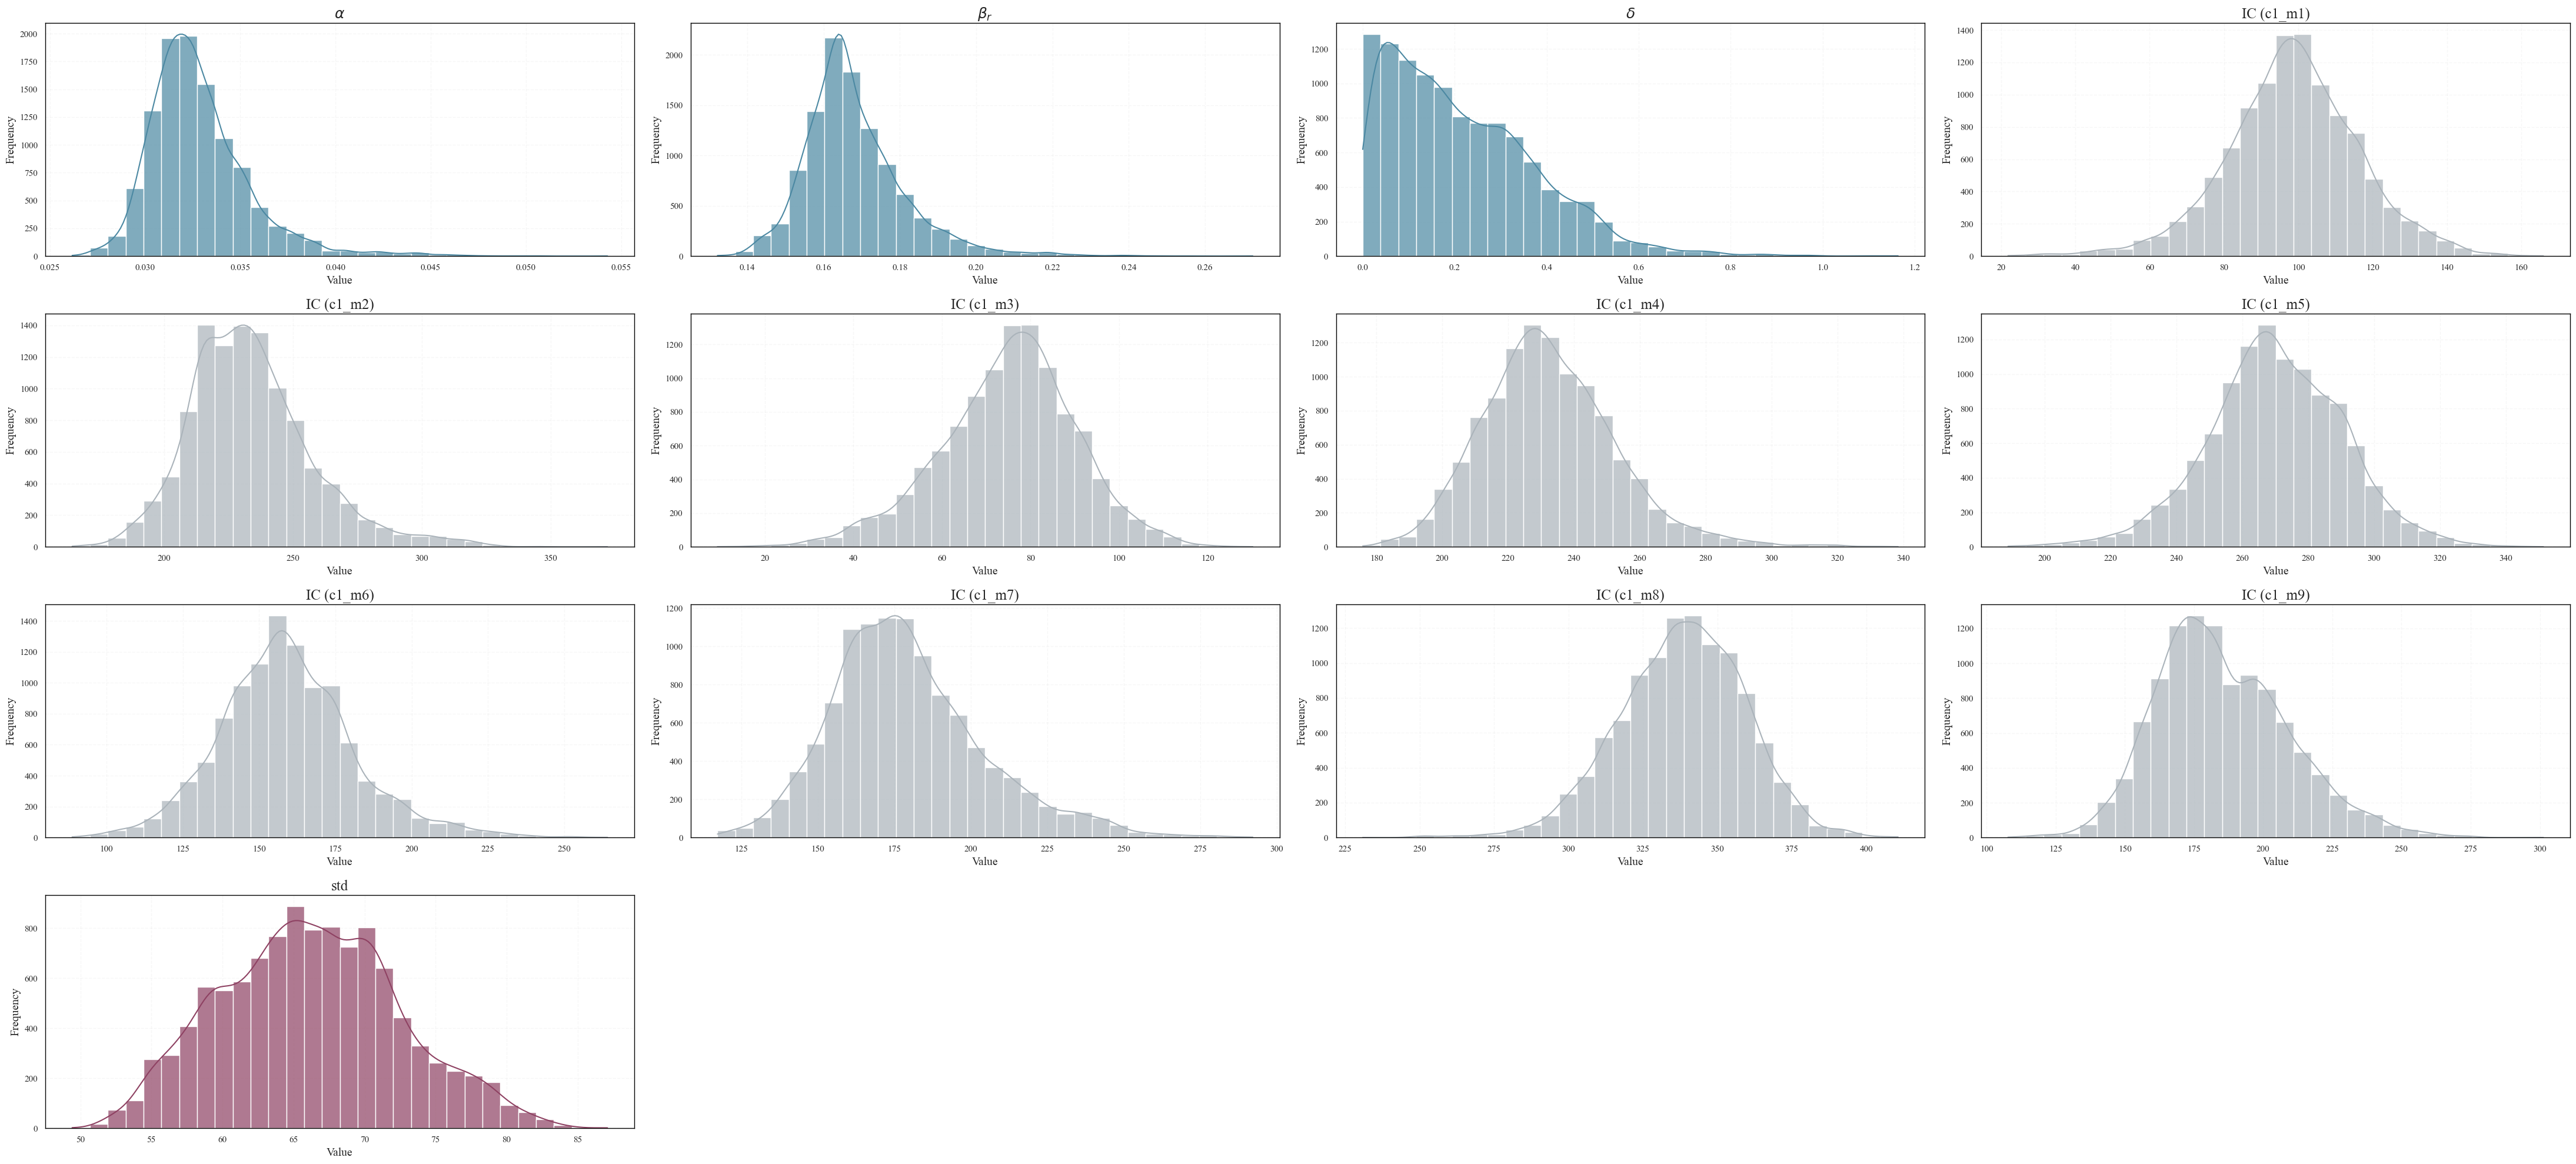

In [14]:
import os
import pandas as pd
import glob
import math
import emcee
import string
import corner
import numpy as np
from tqdm import tqdm
from numba import jit
import concurrent.futures
from multiprocessing import Pool
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
from scipy.integrate import odeint
import seaborn as sns

class SciFormatterWithDecimals(mticker.ScalarFormatter):
    def _set_format(self):
        self.format = '%.1f'

# Find and sort all text files in the ./data directory
data_files = sorted(glob.glob("./data/*.txt"))

# Dictionary to store the parsed data, grouped by data type
full_data = {}

# Loop through each file in the data_files list
for file in data_files:
    # Extract the data type (treatment and cell type) from the file name
    data_type = os.path.basename(file).split('/')[-1].split('_c')[0]
    
    # Extract the mouse name (cohort identifier) from the file name
    mouse_name = 'c' + file.split('/')[-1].split('_c')[-1].split('_t')[0]
    
    # Extract the treatment days from the file name (as integers)
    t_days = np.array([int(t) for t in file.split('/')[-1].split('_c')[-1].split('.txt')[0].split('_t')[1:]])
    
    # Load the measurement data from the file (time, tumor volume)
    data = np.loadtxt(file)
    
    # Extract the specific treatment from the data type (e.g., radiation or control)
    treatment = os.path.basename(data_type).split('_')[0]
    
    # If this data type hasn't been seen before, create a new list in full_data
    if data_type not in full_data:
        full_data[data_type] = []
    
    # Append the mouse's data (including name, tumor measurements, treatment, and treatment days) to the appropriate group
    full_data[data_type].append({
        'name': mouse_name,
        'data': data,
        'treatment': treatment,
        'treatment_days': t_days
    })

def configure_plot_settings(fontsize):
    plt.rcParams['font.size'] = fontsize
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3, 2))
    return formatter


def finalize_plot(fig, axes, nScenarios, nCols, nRows, full_exp, full_model, save, show, figure_name, formatter):
    final_exp = np.concatenate(full_exp, axis=0) if full_exp else np.array([])
    final_model = np.concatenate(full_model, axis=0) if full_model else np.array([])

    if final_exp.size == 0 or final_model.size == 0:
        print("Error: One of the final arrays is empty.")
        return

    rounded_max = math.ceil(np.max(np.concatenate([final_exp, final_model])) / 1000) * 1000
    for ax in axes[:nScenarios]:
        ax.set_ylim((0, rounded_max))
        ax.yaxis.set_major_formatter(formatter)
    for i in range(nScenarios, nRows * nCols):
        fig.delaxes(axes[i])
    if save:
        plt.savefig(figure_name + '.pdf', bbox_inches='tight', pad_inches=0.02)
    if show:
        plt.show()
    else:
        plt.close()

def plot_distributions_by_group(chain_files, full_data, group_name, parameter_labels, fontsize='14', nCols=3, save = False, show = False, figure_name='distr_params'):

    if not show and not save:
        return 
    
    formatter = configure_plot_settings(fontsize)
    plt.rcParams['font.size'] = fontsize
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3, 2))
    
    print(f"Processing distributions for the group: {group_name}")
    all_samples = []

    colors = {
        'global_params': '#4B88A2', 
        'initial_conditions': '#AAB3BA',
        'std': '#8E4162'  
    }

    for chain_file in chain_files:
        print(f"Reading the chains file: {chain_file}")
        chain_data = np.loadtxt(chain_file)
        all_samples.append(chain_data)

    all_samples = np.vstack(all_samples)

    ndim = len(full_data[group_name])
    n_params = all_samples.shape[1]

    global_params = range(n_params - (ndim + 1)) 
    initial_conditions = range(n_params - (ndim + 1), n_params - 1) 
    std_index = n_params - 1 

    total_params = len(global_params) + ndim + 1
    nRows = int(np.ceil(total_params / nCols))

    fig, axes = plt.subplots(nrows=nRows, ncols=nCols, figsize=(nCols * 11, nRows * 5), sharex=False)
    axes = axes.ravel()

    idx = 0  

    for param_idx in global_params:
        label = parameter_labels[param_idx] 
        sns.histplot(all_samples[:, param_idx], bins=30, kde=True, ax=axes[idx], color=colors['global_params'], alpha=0.7)
        axes[idx].set_title(f'{label}', fontsize=18)
        axes[idx].set_xlabel('Value', fontsize=14)
        axes[idx].set_ylabel('Frequency', fontsize=14)
        axes[idx].grid(True, linestyle='--', alpha=0.15)
        idx += 1

    for mouse_idx, param_idx in enumerate(initial_conditions):
        mouse_name = full_data[group_name][mouse_idx]['name']
        label = f'IC ({mouse_name})'  # Rótulo com nome do camundongo
        sns.histplot(all_samples[:, param_idx], bins=30, kde=True, ax=axes[idx], color=colors['initial_conditions'], alpha=0.7)
        axes[idx].set_title(f'{label}', fontsize=18)
        axes[idx].set_xlabel('Value', fontsize=14)
        axes[idx].set_ylabel('Frequency', fontsize=14)
        axes[idx].grid(True, linestyle='--', alpha=0.15)
        idx += 1

    for empty_ax in axes[idx+1:]:
        empty_ax.remove()  

    sns.histplot(all_samples[:, std_index], bins=30, kde=True, ax=axes[idx], color=colors['std'], alpha=0.7)
    axes[idx].set_title('std', fontsize=18)
    axes[idx].set_xlabel('Value', fontsize=14)
    axes[idx].set_ylabel('Frequency', fontsize=14)
    axes[idx].grid(True, linestyle='--', alpha=0.15)

    plt.tight_layout()
    if save:
        plt.savefig(f'{figure_name}_{group_name}.pdf', bbox_inches='tight', pad_inches=0.1)
    if show:
        plt.show()
    plt.close()

chain_files_sensitive = ['./Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV2.gz']
chain_files_resistant = ['./Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz']

parameter_labels_sensitive = ['$\\alpha$', '$\\beta_s$', '$\\delta$']  
parameter_labels_resistant = ['$\\alpha$', '$\\beta_r$', '$\\delta$']  

# Plot for control_sensitive
# plot_distributions_by_group(chain_files_sensitive, full_data, "radiation_sensitive", parameter_labels_sensitive, save = True, nCols=4)

# Plot for control_resistant
plot_distributions_by_group(chain_files_resistant, full_data, "radiation_resistant", parameter_labels_resistant, show= True, nCols=4)


Processing distributions for the group: radiation_resistant
Reading the chains file: ./Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz
Best parameter for $\beta_r$: 0.16845888451488295 ± 0.01319002214956479


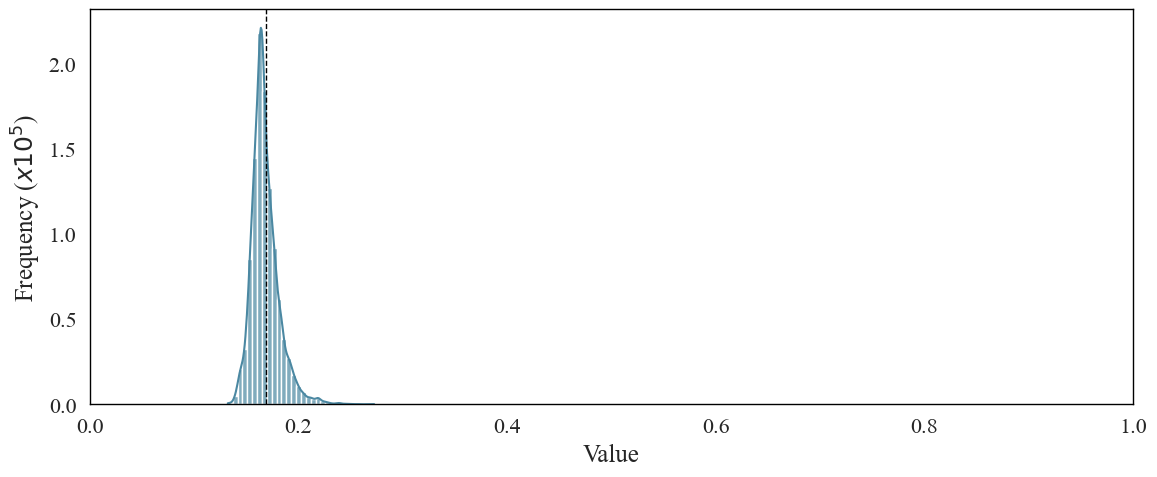

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker
class SciFormatterWithDecimals(mticker.ScalarFormatter):
    def _set_format(self):
        self.format = '%.1f'

def configure_plot_settings(fontsize):
    plt.rcParams['font.size'] = fontsize
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3, 2))
    return formatter

def plot_distributions_by_group(chain_files, full_data, group_name, parameter_labels, fontsize='14', nCols=3, 
                                save = False, show = False, figure_name='distr_beta', best_npz=None):

    if not show and not save:
        return 

    formatter = configure_plot_settings(fontsize)
    plt.rcParams['font.size'] = fontsize
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3, 2))
    
    print(f"Processing distributions for the group: {group_name}")
    all_samples = []

    colors = {
        'global_params': '#4B88A2', 
        'initial_conditions': '#AAB3BA',  
        'std': '#8E4162' 
    }

    for chain_file in chain_files:
        print(f"Reading the chains file: {chain_file}")
        chain_data = np.loadtxt(chain_file)
        all_samples.append(chain_data)

    best_pars = None
    if best_npz is not None:
        npz = np.load(best_npz)
        best_pars = npz['pars']

    all_samples = np.vstack(all_samples)

    ndim = len(full_data[group_name])
    n_params = all_samples.shape[1] 

    first_parameter = 1

    global_params = [first_parameter]

    initial_conditions = range(n_params - (ndim + 1), n_params - 1)  
    std_index = n_params - 1 

    total_params = len(global_params)
    nRows = int(np.ceil(total_params / nCols))

    fig, axes = plt.subplots(nrows=nRows, ncols=nCols, figsize=(nCols * 11, nRows * 5), sharex=False)
    axes = axes.ravel()

    idx = 0 
    for i, param_idx in enumerate(global_params):
        ax = axes[i]
        label = parameter_labels[param_idx]
        sns.histplot(all_samples[:, param_idx],
                     bins=30, kde=True,
                     ax=ax, color=colors['global_params'], alpha=0.7)
        if best_pars is not None:
            axes[i].axvline(float(best_pars[param_idx]), linestyle='--', linewidth=1, color='black', label='Best Parameters')
            print(f"Best parameter for {label}: {best_pars[param_idx]} ± {np.std(all_samples[:, param_idx])}")

        sci_fmt = SciFormatterWithDecimals(useMathText=True)
        sci_fmt.set_scientific(True)      
        sci_fmt.set_powerlimits((0, 0))    
        sci_fmt.set_useOffset(False)      
        
        ax.xaxis.set_major_formatter(sci_fmt)
        ax.yaxis.set_major_formatter(sci_fmt)
        ax.yaxis.offsetText.set_visible(False)
        ax.xaxis.offsetText.set_visible(True)
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.set_ylabel(r'Frequency ($x10^5$)', fontsize=18)
        ax.set_xlabel(r'Value', fontsize=18)

        ax.grid(False)
        ax.set_xlim(0, 1)

    for empty_ax in axes[idx+1:]:
        empty_ax.remove()

    plt.tight_layout()

    plt.tight_layout()
    if save:
        plt.savefig(f'{figure_name}_{group_name}.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
    if show:
        plt.show()
    plt.close()

chain_files_sensitive = ['./Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV2.gz']
chain_files_resistant = ['./Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz']

parameter_labels_sensitive = ['$\\alpha$', '$\\beta_s$', '$\\delta$'] 
parameter_labels_resistant = ['$\\alpha$', '$\\beta_r$', '$\\delta$']  

# Plot for control_sensitive
# plot_distributions_by_group(chain_files_sensitive, full_data, "radiation_sensitive", parameter_labels_sensitive, save = True, show= True, nCols=4, best_npz='./Output_Calibration/multi_ll_pars_radiation_sensitive_ExponentialDecayDelayV2.npz')

# Plot for control_resistant
plot_distributions_by_group(chain_files_resistant, full_data, "radiation_resistant", parameter_labels_resistant, show= True, nCols=4, best_npz='./Output_Calibration/multi_ll_pars_radiation_resistant_ExponentialDecayDelayV2.npz')

### Posterior probability that $\beta_r$ exceeds $\beta_s$ (Monte Carlo estimate)

In this analysis, the quantity $P(\beta_r > \beta_s \mid \text{data})$ is **not** a frequentist hypothesis test. Instead, it is a **posterior probability** estimated directly from the MCMC draws (Monte Carlo integration).

Let $\{\beta_s^{(i)}\}_{i=1}^{n}$ denote samples from the posterior distribution of $\beta$ for the radiation-sensitive cohort, and $\{\beta_r^{(j)}\}_{j=1}^{m}$ samples from the posterior of $\beta$ for the radiation-resistant cohort. The probability that a posterior draw from the resistant group exceeds a posterior draw from the sensitive group can be estimated as

$$
P(\beta_r > \beta_s \mid \text{data})
\approx
\frac{1}{N}\sum_{k=1}^{N}\mathbf{1}\!\left(\beta_r^{(k)} > \beta_s^{(k)}\right),
$$

where $\mathbf{1}(\cdot)$ is the indicator function (equal to 1 if the inequality is true and 0 otherwise), and $\{(\beta_r^{(k)}, \beta_s^{(k)})\}_{k=1}^{N}$ are paired values obtained by randomly sub-sampling $N$ draws from each posterior distribution. Sub-sampling (e.g., $N=5000$) is used to reduce the effect of autocorrelation in the MCMC chain and to avoid artificially extreme results from very large sample sizes.

**Interpretation.** The output `P(\beta_r > \beta_s) = 1.000000` means that, across the $N$ sampled pairs, all comparisons satisfied $\beta_r^{(k)} > \beta_s^{(k)}$. Thus, the Monte Carlo estimate of the posterior probability is $\hat{p}=1$. Since this is an estimate based on finite $N$, it is often reported conservatively as $P(\beta_r>\beta_s)\approx 1$ or $P(\beta_r>\beta_s) > 0.999$ (for large $N$), indicating extremely strong posterior evidence that $\beta$ is larger in the resistant cohort.

**Note.** If $\beta_s$ and $\beta_r$ were sampled jointly within the same MCMC run (i.e., both parameters are present in each iteration), the preferred computation is to compare them *within the same draw* $k$ to preserve posterior dependence:
$$
P(\beta_r > \beta_s \mid \text{data})
\approx
\frac{1}{N}\sum_{k=1}^{N}\mathbf{1}\!\left(\beta_r^{(k)} > \beta_s^{(k)}\right).
$$
In the present case, because the posteriors were generated from separate chains for each cohort, the estimate should be interpreted as the probability that an independent posterior draw from the resistant distribution exceeds an independent posterior draw from the sensitive distribution.


In [8]:
import numpy as np
from scipy.stats import mannwhitneyu

def compare_posterior_param_between_groups(
    chain_files_sensitive,
    chain_files_resistant,
    param_col=1,
    param_name=r"\beta",
    seed=42,
    n_subsample=5000,
    two_sided=True,
    positive_only=True,
):
    """
    Compare posterior distributions of a parameter (e.g., beta) between two groups using MCMC samples from chain files.

    Return Bayesian metrics (posterior probability, ratio/difference, and CIs) and, optionally, p-value (Mann–Whitney U) at the reviewer's request.

    Args:
        chain_files_sensitive (list[str]): list of paths to the chains of the sensitive group.
        chain_files_resistant (list[str]): list of paths to the chains of the resistant group.
        param_col (int): index of the parameter column in the chain (in your case, beta ~ column 1).
        param_name (str): name of the parameter to print.
        seed (int): RNG seed.
        n_subsample (int): subsample size per group (mitigates autocorrelation/huge N).
        two_sided (bool): True -> two-tailed test; False -> one-tailed (robust > sensitive).
        positive_only (bool): filters out non-positive samples (useful for ratios).

    Returns:
    dict with summaries and p-value.
    """

    def _load_concat(chain_files):
        all_samples = []
        for cf in chain_files:
            x = np.loadtxt(cf)
            if x.ndim == 1:
                x = x.reshape(1, -1)
            all_samples.append(x)
        return np.vstack(all_samples)

    cs = _load_concat(chain_files_sensitive)
    cr = _load_concat(chain_files_resistant)

    beta_s = cs[:, param_col].astype(float)
    beta_r = cr[:, param_col].astype(float)

    if positive_only:
        beta_s = beta_s[beta_s > 0]
        beta_r = beta_r[beta_r > 0]

    if beta_s.size < 10 or beta_r.size < 10:
        raise ValueError("Few valid samples after filtering. Check ‘param_col’ and/or the positive_only filter.")

    rng = np.random.default_rng(seed)
    n_s = min(n_subsample, beta_s.size)
    n_r = min(n_subsample, beta_r.size)
    beta_s_sub = beta_s[rng.choice(beta_s.size, size=n_s, replace=False)]
    beta_r_sub = beta_r[rng.choice(beta_r.size, size=n_r, replace=False)]

    prob_gt = float(np.mean(beta_r_sub > beta_s_sub))

    ratio = beta_r_sub / beta_s_sub
    diff  = beta_r_sub - beta_s_sub

    ratio_med = float(np.median(ratio))
    ratio_ci  = tuple(np.percentile(ratio, [2.5, 97.5]).astype(float))

    diff_med = float(np.median(diff))
    diff_ci  = tuple(np.percentile(diff, [2.5, 97.5]).astype(float))

    alternative = "two-sided" if two_sided else "greater" 
    u_stat, pval = mannwhitneyu(beta_r_sub, beta_s_sub, alternative=alternative)

    out = {
        "param": param_name,
        "param_col": int(param_col),
        "n_used_sensitive": int(n_s),
        "n_used_resistant": int(n_r),
        "P(resistant > sensitive)": prob_gt,
        "median_ratio_res_over_sens": ratio_med,
        "ratio_95CI": ratio_ci,
        "median_diff_res_minus_sens": diff_med,
        "diff_95CI": diff_ci,
        "mannwhitney_U": float(u_stat),
        "mannwhitney_pvalue": float(pval),
        "mannwhitney_alternative": alternative,
    }

    print(f"\n[POSTERIOR COMPARISON] {param_name} (col={param_col})")
    print(f"Subsample sizes: sensitive={n_s}, resistant={n_r}")
    print(f"P({param_name}_r > {param_name}_s) = {out['P(resistant > sensitive)']:.6f}")
    print(f"Median ratio ({param_name}_r/{param_name}_s) = {ratio_med:.4g}  |  95% CI = [{ratio_ci[0]:.4g}, {ratio_ci[1]:.4g}]")
    print(f"Median diff  ({param_name}_r-{param_name}_s) = {diff_med:.4g}  |  95% CI = [{diff_ci[0]:.4g}, {diff_ci[1]:.4g}]")
    print(f"Mann–Whitney U ({alternative}) p-value = {pval:.3e}")

    return out

res_beta = compare_posterior_param_between_groups(
    chain_files_sensitive=['./Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV2.gz'],
    chain_files_resistant=['./Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz'],
    param_col=1,          # beta ~ col 1
    param_name=r"\beta",
    n_subsample=5000,
    two_sided=True        # or False if you only want to test “resistant > sensitive”
)


[POSTERIOR COMPARISON] \beta (col=1)
Subsample sizes: sensitive=5000, resistant=5000
P(\beta_r > \beta_s) = 1.000000
Median ratio (\beta_r/\beta_s) = 1.967  |  95% CI = [1.631, 2.504]
Median diff  (\beta_r-\beta_s) = 0.0816  |  95% CI = [0.05859, 0.1176]
Mann–Whitney U (two-sided) p-value = 0.000e+00


# Posterior CCC, PCC and 95% Credible Interval


Processing group: radiation_sensitive
Reading the chains file: ./Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV2.gz

Processing group: radiation_resistant
Reading the chains file: ./Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz

./Output_Calibration/multi_ll_pars_radiation_sensitive_ExponentialDecayDelayV2.npz - Best Parameters: [3.05895259e-02 8.66550650e-02 2.45204060e-01 1.54106847e+02
 1.59438339e+02 9.09925676e+01 1.62682978e+02 3.06735593e+02
 1.92626645e+02 1.43264476e+02 1.39475132e+02 2.11880163e+02
 2.32791496e+02 1.95684665e+02 2.15604514e+02 2.50320806e+02
 1.61839205e+02 1.13622692e+02 5.42444864e+01]

./Output_Calibration/multi_ll_pars_radiation_resistant_ExponentialDecayDelayV2.npz - Best Parameters: [3.05895259e-02 1.68458885e-01 2.45204060e-01 6.86706413e+01
 1.83607835e+02 8.16773441e+01 1.92162370e+02 2.44457106e+02
 1.55683448e+02 1.37628535e+02 3.32682338e+02 1.54292007e+02
 5.42444864e+01]


C:\Users\guilh\AppData\Local\Temp\ipykernel_26604\2940994508.py:748: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


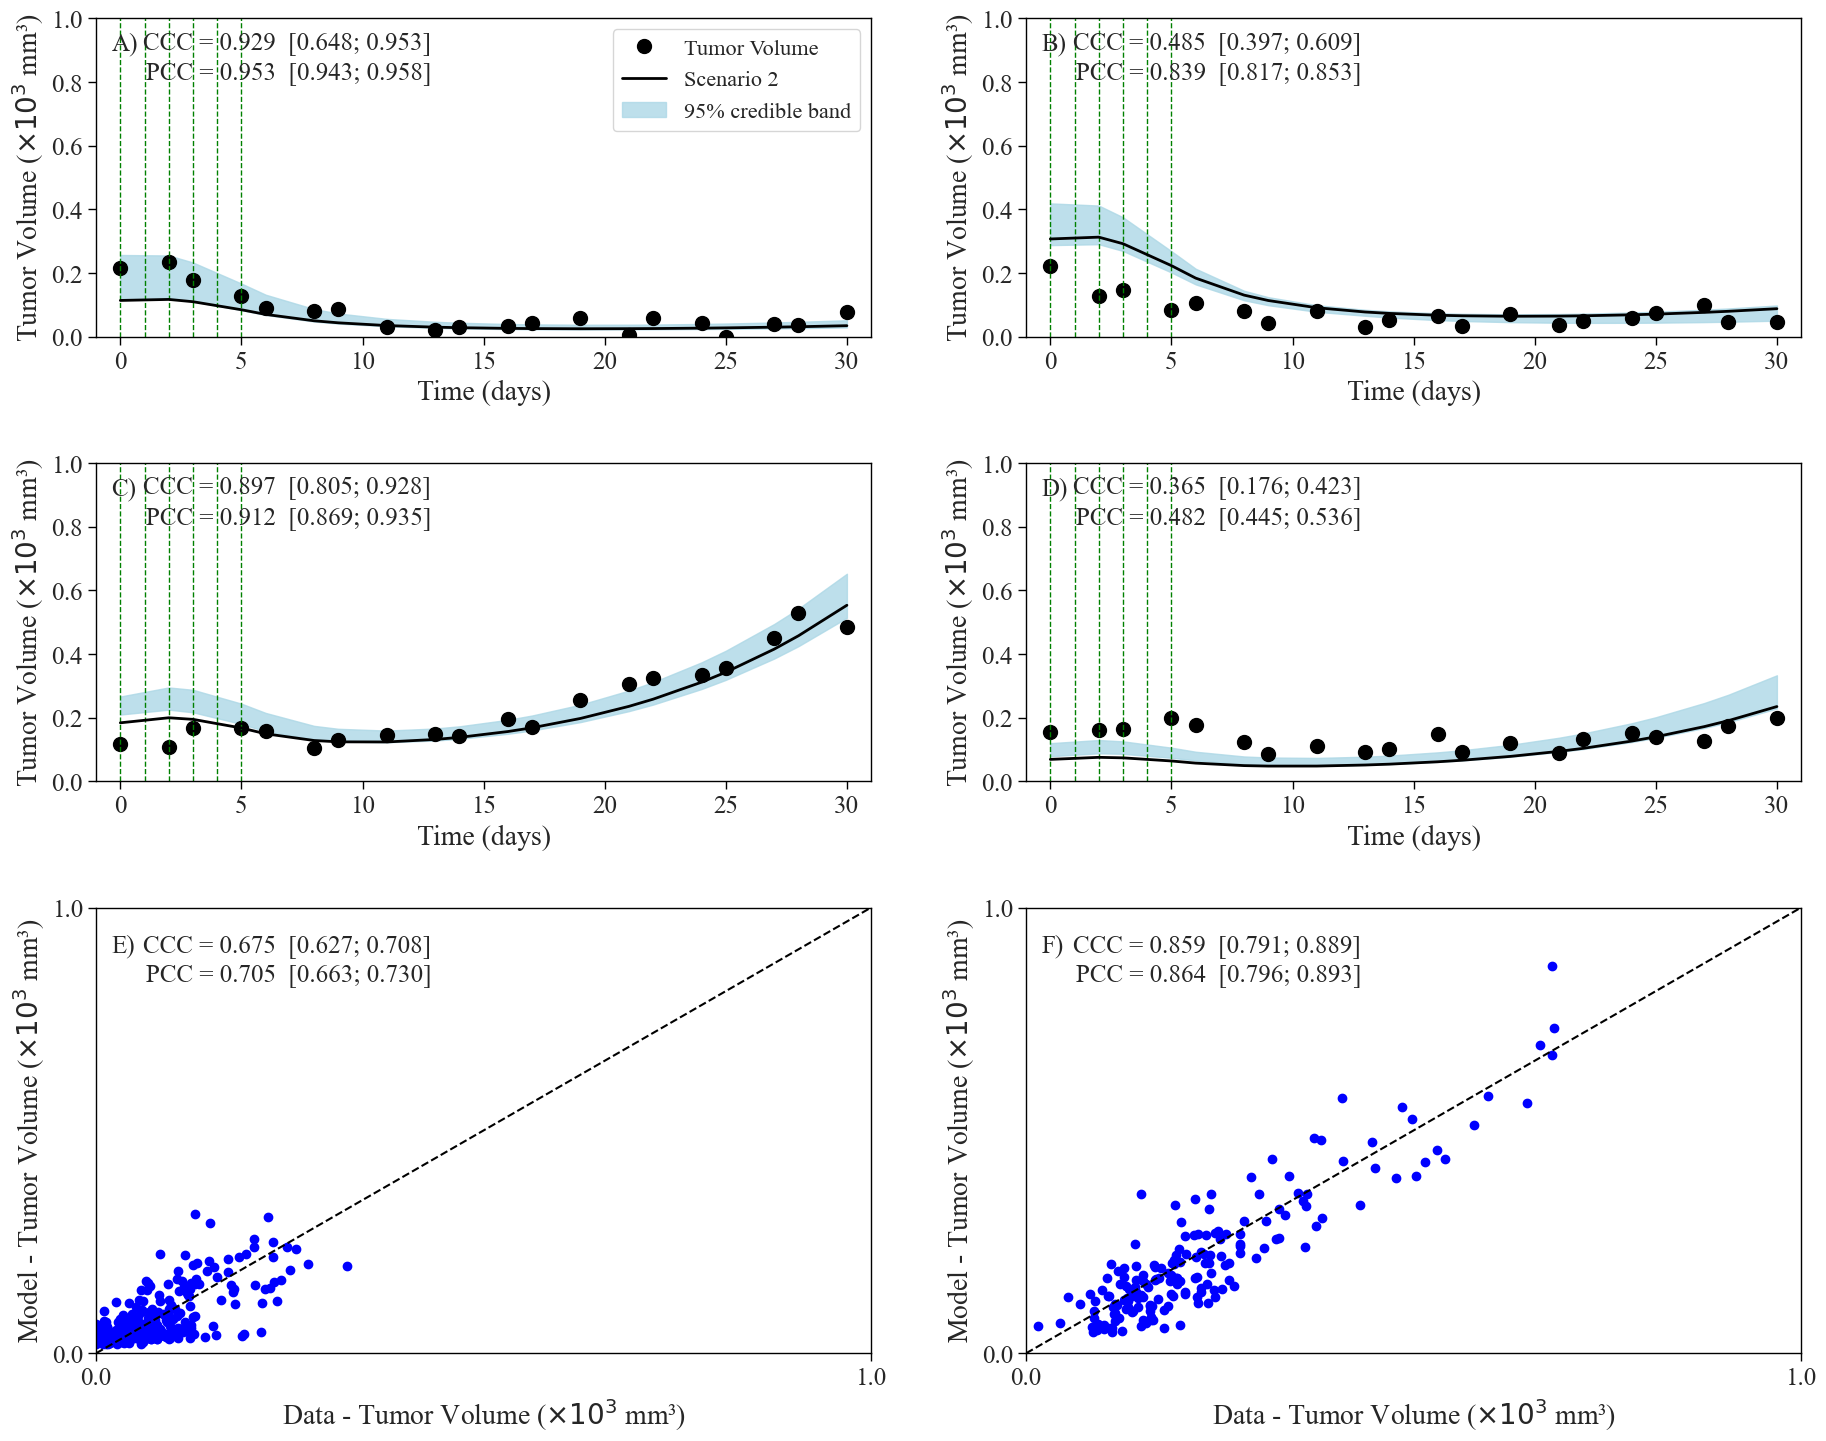

In [11]:
import os
import pandas as pd
import glob
import math
import emcee
import string
import corner
import numpy as np
from tqdm import tqdm
from numba import jit
import concurrent.futures
from multiprocessing import Pool
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec 
from scipy.integrate import odeint
import seaborn as sns
# import scipy.stats as stats
import sys
import random
import scipy.stats
from matplotlib.ticker import ScalarFormatter
class ScalarFormatterWithDecimals(ScalarFormatter):
    def _set_format(self):
        self.format = '%.1f'

# Find and sort all text files in the ./data directory
data_files = sorted(glob.glob("./data/*.txt"))

# Dictionary to store the parsed data, grouped by data type
full_data = {}

# Loop through each file in the data_files list
for file in data_files:
    # Extract the data type (treatment and cell type) from the file name
    data_type = os.path.basename(file).split('/')[-1].split('_c')[0]
    
    # Extract the mouse name (cohort identifier) from the file name
    mouse_name = 'c' + file.split('/')[-1].split('_c')[-1].split('_t')[0]
    
    # Extract the treatment days from the file name (as integers)
    t_days = np.array([int(t) for t in file.split('/')[-1].split('_c')[-1].split('.txt')[0].split('_t')[1:]])
    
    # Load the measurement data from the file (time, tumor volume)
    data = np.loadtxt(file)
    
    # Extract the specific treatment from the data type (e.g., radiation or control)
    treatment = os.path.basename(data_type).split('_')[0]
    
    # If this data type hasn't been seen before, create a new list in full_data
    if data_type not in full_data:
        full_data[data_type] = []
    
    # Append the mouse's data (including name, tumor measurements, treatment, and treatment days) to the appropriate group
    full_data[data_type].append({
        'name': mouse_name,
        'data': data,
        'treatment': treatment,
        'treatment_days': t_days
    })

# Concordance Correlation Coefficient
def ccc(x, y):
    """
    Calculate the Concordance Correlation Coefficient (CCC).

    Parameters:
    - x, y: Input data arrays

    Returns:
    - CCC value
    """
    x, y = np.asarray(x), np.asarray(y)
    
    if len(x) != len(y):
        raise ValueError("Input arrays must have the same length")
    
    if x.size == 0 or y.size == 0:
        raise ValueError("Input arrays must not be empty")
    
    mean_x, mean_y = np.mean(x), np.mean(y)
    var_x, var_y = np.var(x), np.var(y)
    
    if var_x == 0 or var_y == 0:
        raise ValueError("Input arrays must not have zero variance")
    
    covariance = np.cov(x, y, bias=True)[0, 1]
    ccc_value = (2 * covariance) / (var_x + var_y + (mean_x - mean_y) ** 2)
    
    return ccc_value

# Pearson Correlation Coefficient
def pcc(x, y):
    """
    Calculate the Pearson Correlation Coefficient (PCC).

    Parameters:
    - x, y: Input data arrays

    Returns:
    - PCC value
    """
    x, y = np.asarray(x), np.asarray(y)
    
    if len(x) != len(y):
        raise ValueError("Input arrays must have the same length")
    
    if x.size == 0 or y.size == 0:
        raise ValueError("Input arrays must not be empty")
    
    mean_x, mean_y = np.mean(x), np.mean(y)
    std_x, std_y = np.std(x), np.std(y)
    
    if std_x == 0 or std_y == 0:
        raise ValueError("Input arrays must not have zero variance")
    
    covariance = np.cov(x, y, bias=True)[0, 1]
    pcc_value = covariance / (std_x * std_y)
    
    return pcc_value

# Normalized Root Mean Squared Error
def nrmse(actual, pred): 
    """
    Calculate the Normalized Root Mean Squared Error (NRMSE).

    Parameters:
    - actual: Actual values
    - pred: Predicted values

    Returns:
    - NRMSE value
    """
    actual, pred = np.asarray(actual), np.asarray(pred)
    
    if len(actual) != len(pred):
        raise ValueError("Input arrays must have the same length")
    
    if actual.size == 0 or pred.size == 0:
        raise ValueError("Input arrays must not be empty")
    
    rmse = np.sqrt(np.mean((actual - pred)**2))
    nrmse_value = rmse / np.mean(actual) * 100
    
    return nrmse_value

# Mean Absolute Percentage Error
def mape(pred, actual): 
    """
    Calculate the Mean Absolute Percentage Error (MAPE).

    Parameters:
    - actual: Actual values
    - pred: Predicted values

    Returns:
    - MAPE value
    """
    actual, pred = np.asarray(actual), np.asarray(pred)
    
    if len(actual) != len(pred):
        raise ValueError("Input arrays must have the same length")
    
    if actual.size == 0 or pred.size == 0:
        raise ValueError("Input arrays must not be empty")
    
    if np.any(actual == 0):
        raise ValueError("Actual values must not contain zeros")
    
    mape_value = np.mean(np.abs((actual - pred) / actual)) * 100
    
    return mape_value

def summarize_posterior(arr, alpha=0.05):
    arr = np.asarray(arr, dtype=float)
    med = np.median(arr)
    lo, hi = np.percentile(arr, [100*alpha/2, 100*(1-alpha/2)])
    return med, lo, hi

@jit(nopython=True)
def model_ExponentialDecayDelay(y, t, growth_rate, carrying_capacity, a_radiation, b_radiation, delay, tau_radiation, dose_schedule):
    tumor = y
    tumor_volume = growth_rate * tumor * (1 - tumor / carrying_capacity)

    treatment_effect = 0
    for dose, tau in zip(dose_schedule, tau_radiation):
        if t >= tau + delay: 
            treatment_effect += a_radiation * dose * np.exp(-b_radiation * (t - tau - delay))

    tumor_volume -= treatment_effect * tumor 
    return tumor_volume


def solve_model(model_extension, time_array, parameters, initial_condition, treatment_days, dose, type_sol='data'):
    model_func = model_ExponentialDecayDelay

    growth_rate, carrying_capacity, alpha, beta, delta = parameters

    tau_radiation = treatment_days
    dose_schedule = [dose] * len(tau_radiation)

    if type_sol == 'smooth':
        bgn_p = round(time_array[0], 1)
        end_p = round(time_array[-1], 1)
        time_array = np.linspace(bgn_p, end_p, int((end_p - bgn_p) / 0.1) + 1)
        sol = odeint(model_func, y0=[initial_condition], t=time_array,
                     args=(growth_rate, carrying_capacity, alpha, beta, delta, tau_radiation, dose_schedule),
                     mxstep=2000)
        return np.column_stack((time_array, sol))
    else:
        return odeint(model_func, y0=[initial_condition], t=time_array,
                      args=(growth_rate, carrying_capacity, alpha, beta, delta, tau_radiation, dose_schedule),
                      mxstep=2000)
    
        
def find_max_time_per_group(full_data):
    max_times = {}

    for group, mice_data in full_data.items():
        max_time = 0

        for mouse in mice_data:
            time_data = mouse['data'][:, 0] 
            max_time_mouse = max(time_data)

            if max_time_mouse > max_time:
                max_time = max_time_mouse

        max_times[group] = max_time

    return max_times


def analyze_chains_for_groups(chain_files_sensitive, chain_files_resistant, full_data):
    results = {}

    for group, chain_files in zip(['radiation_sensitive', 'radiation_resistant'], 
                                  [chain_files_sensitive, chain_files_resistant]):
        print(f"\nProcessing group: {group}")
        
        group_results = {}  

        model_extension = "_ExponentialDecayDelay" 
        rs = 8.89429860e-02  
        rr = 1.15631515e-01 
        carrying_capacity = 3.69671552e+03  
        ndim = len(full_data[group])
        
        for chain_file in chain_files:
            print(f"Reading the chains file: {chain_file}")
            chain_data = np.loadtxt(chain_file)

            selected_indices = random.sample(range(len(chain_data)), 10)
            selected_samples = chain_data[selected_indices, :]

            for idx, mouse_data in enumerate(full_data[group]):
                mouse_name = mouse_data['name']
                data = mouse_data['data']

                num_time_points = len(data[:, 0])
                solution_matrix = np.zeros((len(selected_samples), num_time_points))

                growth_rate = rs if group == 'radiation_sensitive' else rr

                for sample_idx, theta in enumerate(selected_samples):
                    
                    treatment_days = mouse_data['treatment_days']
                    dose = 2.0

                    alpha, beta, delta = theta[:3]
                    initial_conditions = theta[3:-1] 

                    initial_condition = initial_conditions[idx]

                    solution = solve_model(
                    model_extension, 
                    data[:, 0],
                    (growth_rate, carrying_capacity, alpha, beta, delta),  
                    initial_condition,
                    treatment_days,
                    dose,
                    type_sol="smooth"
                    )

                    mask = np.isin(solution[:, 0], data[:, 0])
                    selected_solution = solution[mask]

                    matched_solution_volumes = selected_solution[:, 1]

                    solution_matrix[sample_idx, :] = matched_solution_volumes

                group_results[mouse_name] = solution_matrix

        results[group] = group_results

    return results

chain_files_sensitive = [
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV2.gz',
]

chain_files_resistant = [
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz'
]

results = analyze_chains_for_groups(chain_files_sensitive, chain_files_resistant, full_data)


def summarize_solutions_with_ci(results):

    summarized = {}
    for grp, mice in results.items():
        summarized[grp] = {}
        for mouse, mtx in mice.items():  
            mean = mtx.mean(axis=0)
            p_lo, p_hi = np.percentile(mtx, [2.5, 97.5], axis=0)
            summarized[grp][mouse] = {
                'mean': mean,
                'ci_positive': p_hi,
                'ci_negative': p_lo
            }
    return summarized

summarized_results1 = summarize_solutions_with_ci(results)

def configure_plot_settings(fontsize):
    plt.rcParams['font.size'] = fontsize
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3, 2))
    return formatter


def finalize_plot(fig, axes, nScenarios, nCols, nRows, full_exp, full_model, save, show, figure_name, formatter):
    final_exp = np.concatenate(full_exp, axis=0) if full_exp else np.array([])
    final_model = np.concatenate(full_model, axis=0) if full_model else np.array([])

    if final_exp.size == 0 or final_model.size == 0:
        print("Error: One of the final arrays is empty.")
        return

    rounded_max = math.ceil(np.max(np.concatenate([final_exp, final_model])) / 1000) * 1000
    for ax in axes[:nScenarios]:
        ax.set_ylim((0, rounded_max))
        ax.yaxis.set_major_formatter(formatter)
    for i in range(nScenarios, nRows * nCols):
        fig.delaxes(axes[i])
    if save:
        plt.savefig(figure_name + '.png', dpi=300, bbox_inches='tight', pad_inches=0.02)
    if show:
        plt.show()
    else:
        plt.close()

def posterior_corr_from_chain(chain_path, model_extension, full_data, group,
                                n_samp=200, seed=42):
    if not os.path.exists(chain_path):
        print(f"[ERROR] Chain not found: {chain_path}")
        return None
    chain = np.loadtxt(chain_path)
    if chain.ndim == 1:
        chain = chain.reshape(1, -1)
    ndim = len(full_data[group])
    n_samp = min(n_samp, chain.shape[0])
    rng = np.random.default_rng(seed)
    idx = rng.choice(chain.shape[0], size=n_samp, replace=False)
    thetas = chain[idx, :]

    rs = 8.89429860e-02 
    rr = 1.15631515e-01
    carrying_capacity = 3.69671552e+03

    growth_rate = rs if group == 'radiation_sensitive' else rr

    ccc_samples, pcc_samples = [], []
    for theta in thetas:
        params = tuple(theta[:-(ndim+1)])
        ics = theta[-(ndim+1):-1]
        full_model, full_exp = [], []
        for i, mouse in enumerate(full_data[group]):
            t    = mouse['data'][:, 0]
            y    = mouse['data'][:, 1]
            treatment_days = mouse['treatment_days']
            sol = solve_model(model_extension, t, (growth_rate, carrying_capacity, *params),
                              ics[i], treatment_days, dose=2.0, type_sol='data')
            if sol.ndim == 2 and sol.shape[1] == 1:
                sol = sol[:, 0]
            full_model.append(sol); full_exp.append(y)
        model_concat = np.concatenate(full_model)
        exp_concat = np.concatenate(full_exp)
        ccc_samples.append(float(np.clip(ccc(model_concat, exp_concat), -1, 1)))
        pcc_samples.append(float(np.clip(pcc(model_concat, exp_concat), -1, 1)))

    ccc_med, ccc_lo, ccc_hi = summarize_posterior(ccc_samples)
    pcc_med, pcc_lo, pcc_hi = summarize_posterior(pcc_samples)
    return {"ccc_summary": (ccc_med, ccc_lo, ccc_hi),
            "pcc_summary": (pcc_med, pcc_lo, pcc_hi)}

res_cs = posterior_corr_from_chain(
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV2.gz',
    '_ExponentialDecayDelay', full_data, 'radiation_sensitive', n_samp=1000, seed=42)

res_cr = posterior_corr_from_chain(
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz',
    '_ExponentialDecayDelay', full_data, 'radiation_resistant', n_samp=1000, seed=42)

ccc_med_cs, ccc_lo_cs, ccc_hi_cs = res_cs["ccc_summary"]
pcc_med_cs, pcc_lo_cs, pcc_hi_cs = res_cs["pcc_summary"]
ccc_med_cr, ccc_lo_cr, ccc_hi_cr = res_cr["ccc_summary"]
pcc_med_cr, pcc_lo_cr, pcc_hi_cr = res_cr["pcc_summary"]

def posterior_corr_per_mouse(chain_path, model_extension, full_data, group,
                             n_samp=200, seed=42):

    if not os.path.exists(chain_path):
        print(f"[ERROR] Chain not found: {chain_path}")
        return None, None

    chain = np.loadtxt(chain_path)
    if chain.ndim == 1:
        chain = chain.reshape(1, -1)

    ndim = len(full_data[group])
    n_samp = min(n_samp, chain.shape[0])
    rng = np.random.default_rng(seed)
    idx = rng.choice(chain.shape[0], size=n_samp, replace=False)
    thetas = chain[idx, :]

    rs = 8.89429860e-02 
    rr = 1.15631515e-01 
    carrying_capacity = 3.69671552e+03 

    growth_rate = rs if group == 'radiation_sensitive' else rr

    mouse_names = [m['name'] for m in full_data[group]]
    ccc_samples = {name: [] for name in mouse_names}
    pcc_samples = {name: [] for name in mouse_names}

    for theta in thetas:
  
        params = tuple(theta[:-(ndim+1)])  
        ics    = theta[-(ndim+1):-1]       

        for i, mouse in enumerate(full_data[group]):
            name = mouse['name']
            t    = mouse['data'][:, 0]
            y    = mouse['data'][:, 1]
            treatment_days = mouse['treatment_days']

            sol = solve_model(model_extension, t, (growth_rate, carrying_capacity, *params),
                              ics[i], treatment_days, dose=2.0, type_sol='data')
            if sol.ndim == 2 and sol.shape[1] == 1:
                sol = sol[:, 0]

            ccc_val = float(np.clip(ccc(sol, y), -1, 1))
            pcc_val = float(np.clip(pcc(sol, y), -1, 1))

            ccc_samples[name].append(ccc_val)
            pcc_samples[name].append(pcc_val)

    ccc_res = {name: summarize_posterior(vals) for name, vals in ccc_samples.items()}
    pcc_res = {name: summarize_posterior(vals) for name, vals in pcc_samples.items()}

    return ccc_res, pcc_res

ccc_cs, pcc_cs = posterior_corr_per_mouse(
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV2.gz',
    '_ExponentialDecayDelay', full_data, 'radiation_sensitive', n_samp=1000, seed=42)

ccc_cr, pcc_cr = posterior_corr_per_mouse(
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz',
    '_ExponentialDecayDelay', full_data, 'radiation_resistant', n_samp=1000, seed=42)

post_corr = {
    **{f"s_{name}": ccc_cs[name] for name in ccc_cs.keys()},
    **{f"r_{name}": ccc_cr[name] for name in ccc_cr.keys()}
}
post_pcc = {
    **{f"s_{name}": pcc_cs[name] for name in pcc_cs.keys()},
    **{f"r_{name}": pcc_cr[name] for name in pcc_cr.keys()}
}

def plot_maxll_solution_with_deviation_melhor_pior_juntos(
    files_locations_sensitive, 
    files_locations_resistant, 
    summarized_results, 
    full_data, 
    show=True, 
    save=False, 
    fontsize='18', 
    figure_name='maxll_figure'):

    if not show and not save:
        return 

    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif']  = ['Times New Roman']
    formatter = configure_plot_settings(fontsize)
    plt.rcParams['font.size'] = 20

    def get_suffix(file_location):
        return file_location.split('_')[-1].split('.')[0]

    manual_labels = {
        "ExponentialDecayDelayV2": "Scenario 2"
    }

    def load_parameters(files):
        all_theta, all_suffix = [], []
        for file_location in files:
            npzfile = np.load(file_location)
            best_pars = npzfile['pars']
            all_theta.append(best_pars)
            all_suffix.append(get_suffix(file_location))
            print(f"\n{file_location} - Best Parameters:", best_pars)
        return all_theta, all_suffix

    all_theta_sensitive, all_suffix_sensitive = load_parameters(files_locations_sensitive or [])
    all_theta_resistant, all_suffix_resistant = load_parameters(files_locations_resistant or [])

    max_times = find_max_time_per_group(full_data)
    linestyles = ['solid', 'dashed', 'dotted', 'dashdot']
    colors = ['black', 'red', 'green', 'blue', 'cyan']

    def get_best_worst_mice(group, theta_list, suffix_list):
        mouse_metrics = []
        ndim = len(full_data[group])

        rs = 8.89429860e-02 
        rr = 1.15631515e-01
        carrying_capacity = 3.69671552e+03 

        growth_rate = rs if group == 'radiation_sensitive' else rr

        for idx, mouse_data in enumerate(full_data[group]):
            mouse_name   = mouse_data['name']
            data         = mouse_data['data']
            treatment_days = mouse_data['treatment_days']

            if data[:, 0].max() < 25:  
                continue

            key = f"{'s' if group == 'radiation_sensitive' else 'r'}_{mouse_name}"
            ccc_med, ccc_lo, ccc_hi = post_corr[key]
            pcc_med, pcc_lo, pcc_hi = post_pcc[key]

            alpha, beta, delta = theta_list[0][:3]     
            ic = theta_list[0][-(ndim + 1) + idx]   
            params = (growth_rate, carrying_capacity, alpha, beta, delta)

            sol = solve_model("_ExponentialDecayDelay", data[:, 0], params, ic,
                            treatment_days, 2.0, "smooth")
            mask = np.isin(sol[:, 0], data[:, 0])
            sol_times, sol_volumes = sol[mask, 0], sol[mask, 1]

            ccc_map = ccc(sol_volumes, data[:, 1])
            if ccc_map <= 0:    
                continue

            mouse_metrics.append({
                'name': mouse_name,
                'data': data,
                'idx': idx,
                'best_or_worst': ccc_med,     
                'solution': (sol_times, sol_volumes, 0), 
                'ccc_med': ccc_med, 'ccc_lo': ccc_lo, 'ccc_hi': ccc_hi,
                'pcc_med': pcc_med, 'pcc_lo': pcc_lo, 'pcc_hi': pcc_hi
            })

        best_mouse = max(mouse_metrics, key=lambda m: m['best_or_worst'])
        worst_mouse = min(mouse_metrics, key=lambda m: m['best_or_worst'])

        return worst_mouse, best_mouse

    group_results_info = {
        'radiation_sensitive': get_best_worst_mice('radiation_sensitive', all_theta_sensitive, all_suffix_sensitive),
        'radiation_resistant': get_best_worst_mice('radiation_resistant', all_theta_resistant, all_suffix_resistant)
    }

    def get_final_data(group_name, theta):
        final_exp, final_model = [], []
        if group_name in full_data:
            rs = 8.89429860e-02
            rr = 1.15631515e-01
            carrying_capacity  = 3.69671552e+03            
            ndim = len(full_data[group_name])
            for idx, mouse_data in enumerate(full_data[group_name]):
                growth_rate = rs if group_name =='radiation_sensitive' else rr
                data = mouse_data['data']
                treatment_days = mouse_data['treatment_days']
                dose = 2.0
                alpha, beta, delta = theta[:3]
                parameters = (growth_rate, carrying_capacity, alpha, beta, delta)
                initial_condition = theta[-(ndim+1) + idx]
                solution = solve_model("_ExponentialDecayDelay", data[:, 0], parameters, initial_condition, treatment_days, dose, "smooth")
                mask = np.isin(solution[:, 0], data[:, 0])
                sol_volumes = solution[mask, 1]
                final_exp.append(data[:, 1])
                final_model.append(sol_volumes)
        return final_exp, final_model

    final_exp_sensitive, final_model_sensitive = get_final_data('radiation_sensitive', all_theta_sensitive[0])
    final_exp_resistant, final_model_resistant = get_final_data('radiation_resistant', all_theta_resistant[0])

    def plot_scatter_ax(ax, final_exp, final_model, formatter,
                    ccc_val=None, ccc_ic=None, pcc_val=None, pcc_ic=None):
        all_cccs = []
        for i in range(len(final_exp)):
            ccc_value = ccc(final_model[i], final_exp[i])
            all_cccs.append(ccc_value)
            ax.plot(final_exp[i], final_model[i], 'o', color='blue')

        ax.set_xlabel(r'Data - Tumor Volume ($\times 10^3$ mm³)', fontsize=20)
        ax.set_ylabel(r'Model - Tumor Volume ($\times 10^3$ mm³)', fontsize=20)

        line = mlines.Line2D([0, 1], [0, 1], color='black', linestyle='dashed')
        line.set_transform(ax.transAxes)
        ax.add_line(line)

        final_exp = np.concatenate(final_exp)
        final_model = np.concatenate(final_model)
        max_value = math.ceil(max(max(final_exp), max(final_model)) / 1000) * 1000
        ticks = np.linspace(0, max_value, num=int(max_value/1000)+1)

        ax.set_xlim((0, max_value))
        ax.set_ylim((0, max_value))
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        
        formatter = ScalarFormatterWithDecimals(useMathText=True)
        formatter.set_scientific(True)
        formatter.set_powerlimits((-3, 2))

        ax.xaxis.set_major_formatter(formatter)
        ax.yaxis.set_major_formatter(formatter)
        ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 2), useOffset=False)
        ax.grid(False)

        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color('black')
            spine.set_linewidth(1.0)

        ax.tick_params(axis='both', which='major', length=6, width=1, direction='out', color='black', bottom=True, left=True)
        ax.minorticks_off()

        pccT = pcc(final_model, final_exp)
        cccT = ccc(final_model, final_exp)
        if ccc_val is not None and ccc_ic is not None and pcc_val is not None and pcc_ic is not None:
            ax.text(0.06, 0.94,
                    f'CCC = {ccc_val:.3f}  [{ccc_ic[0]:.3f}; {ccc_ic[1]:.3f}]',
                    transform=ax.transAxes, fontsize=18, verticalalignment='top')
            ax.text(0.065, 0.875,
                f'PCC = {pcc_val:.3f}  [{pcc_ic[0]:.3f}; {pcc_ic[1]:.3f}]',
                transform=ax.transAxes, fontsize=18, verticalalignment='top')
        else:
            pccT = pcc(final_model, final_exp)
            cccT = ccc(final_model, final_exp)
            ax.text(0.06, 0.82,
                    f'CCC/PCC = {cccT:.2f}/{pccT:.2f}',
                    transform=ax.transAxes, fontsize=18)

    fig = plt.figure(figsize=(22, 15))
    gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios=[1, 1, 1.4])

    gs.update(hspace=0.35)

    axes_ts = [fig.add_subplot(gs[i, j]) for i in range(2) for j in range(2)]
    axes_scatter = [fig.add_subplot(gs[2, j]) for j in range(2)]

    full_exp, full_model = [], []

    for i, group in enumerate(['radiation_sensitive', 'radiation_resistant']):
        if group not in group_results_info:
            continue
        best_mouse, worst_mouse = group_results_info[group]
        max_time = max_times[group]
        suffix_list = all_suffix_sensitive if group == 'radiation_sensitive' else all_suffix_resistant
        mouse_data = full_data[group][i]
        treatment_days = mouse_data['treatment_days']
        max_times = find_max_time_per_group(full_data)
        global_max_x = max(max_times.values())
        for ax, mouse_info, tag in zip(axes_ts[i*2:i*2+2], [worst_mouse, best_mouse], ['Pior', 'Melhor']):
            mouse_name, data = mouse_info['name'], mouse_info['data']
            ax.plot(data[:, 0], data[:, 1], 'o', color='black', markersize=10, label='Tumor Volume')
            ax.set_xlabel('Time (days)', fontsize=20)
            ax.set_ylabel(r'Tumor Volume ($\times10^3$ mm³)', fontsize=20)
            ax.set_xlim((-1, max_time + 1))
            ax.grid(False)
            ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 2), useOffset=False)
            ax.yaxis.get_offset_text().set_visible(False)
            ax.set_xlim((-1, global_max_x + 1))
            for t_day in treatment_days:
                ax.axvline(x=t_day, color='green', linestyle='--', linewidth=1)

            sol_times, sol_volumes, scenario_idx = mouse_info['solution']
            label = manual_labels.get(suffix_list[scenario_idx], f'Model {suffix_list[scenario_idx]}')
            ax.plot(sol_times, sol_volumes, color=colors[scenario_idx], linestyle=linestyles[scenario_idx], linewidth=2, label=label)

            ccc_med, ccc_lo, ccc_hi = mouse_info['ccc_med'], mouse_info['ccc_lo'], mouse_info['ccc_hi']
            pcc_med, pcc_lo, pcc_hi = mouse_info['pcc_med'], mouse_info['pcc_lo'], mouse_info['pcc_hi']

            ax.text(0.06, 0.96,
                    f'CCC = {ccc_med:.3f}  [{ccc_lo:.3f}; {ccc_hi:.3f}]',
                    transform=ax.transAxes,
                    fontsize=18,
                    verticalalignment='top')

            ax.text(0.065, 0.865,
                    f'PCC = {pcc_med:.3f}  [{pcc_lo:.3f}; {pcc_hi:.3f}]',
                    transform=ax.transAxes,
                    fontsize=18,
                    verticalalignment='top')

            if mouse_name in summarized_results[group]:
                res = summarized_results[group][mouse_name]
                ax.fill_between(data[:, 0],
                res['ci_positive'],
                res['ci_negative'],
                color='lightblue', alpha=0.8, label= r'95% credible band')
            if ax == axes_ts[0]:
                ax.legend(loc=1, fontsize=16)
            full_model.append(sol_volumes)
            full_exp.append(data[:, 1])

    for idx, ax in enumerate(axes_ts + axes_scatter):
        ax.text(0.02, 0.9, f'{string.ascii_uppercase[idx]})', transform=ax.transAxes, fontsize=18)
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1.0)
        ax.tick_params(axis='both', which='major', length=6, width=1, direction='out', color='black', bottom=True, left=True, labelsize=18)
        ax.minorticks_off()

        ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 2), useOffset=False)
        ax.yaxis.get_offset_text().set_visible(False)

        ax.ticklabel_format(axis='x', style='scientific', scilimits=(-3, 2), useOffset=False)
        ax.xaxis.get_offset_text().set_visible(False)

    plot_scatter_ax(axes_scatter[0], final_exp_sensitive, final_model_sensitive, formatter,
                ccc_val=ccc_med_cs, ccc_ic=[ccc_lo_cs, ccc_hi_cs],
                pcc_val=pcc_med_cs, pcc_ic=[pcc_lo_cs, pcc_hi_cs])

    plot_scatter_ax(axes_scatter[1], final_exp_resistant, final_model_resistant, formatter,
                ccc_val=ccc_med_cr, ccc_ic=[ccc_lo_cr, ccc_hi_cr],
                pcc_val=pcc_med_cr, pcc_ic=[pcc_lo_cr, pcc_hi_cr])

    fig.tight_layout()        
    fig.subplots_adjust(top=1)    
    
    finalize_plot(fig, axes_ts, 4, 2, 2, full_exp, full_model, save, show, figure_name, formatter)
    if save:
        fig.savefig(figure_name + '.png', dpi=300, bbox_inches='tight', pad_inches=0.02)
    plt.show()

    return

plot_maxll_solution_with_deviation_melhor_pior_juntos(
    files_locations_sensitive=[
        './Output_Calibration/multi_ll_pars_radiation_sensitive_ExponentialDecayDelayV2.npz'
    ],
    files_locations_resistant=[
        './Output_Calibration/multi_ll_pars_radiation_resistant_ExponentialDecayDelayV2.npz'
    ],
    summarized_results=summarized_results1,
    full_data=full_data,                  
    show=True,
    save=False,
    figure_name='solutions_w_ci' 
)

# All numerical solutions 


Processing group: radiation_sensitive
Reading the chains file: ./Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV2.gz

Processing group: radiation_resistant
Reading the chains file: ./Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz

./Output_Calibration/multi_ll_pars_radiation_sensitive_ExponentialDecayDelayV2.npz - Best Parameters: [3.05895259e-02 8.66550650e-02 2.45204060e-01 1.54106847e+02
 1.59438339e+02 9.09925676e+01 1.62682978e+02 3.06735593e+02
 1.92626645e+02 1.43264476e+02 1.39475132e+02 2.11880163e+02
 2.32791496e+02 1.95684665e+02 2.15604514e+02 2.50320806e+02
 1.61839205e+02 1.13622692e+02 5.42444864e+01]

./Output_Calibration/multi_ll_pars_radiation_resistant_ExponentialDecayDelayV2.npz - Best Parameters: [3.05895259e-02 1.68458885e-01 2.45204060e-01 6.86706413e+01
 1.83607835e+02 8.16773441e+01 1.92162370e+02 2.44457106e+02
 1.55683448e+02 1.37628535e+02 3.32682338e+02 1.54292007e+02
 5.42444864e+01]


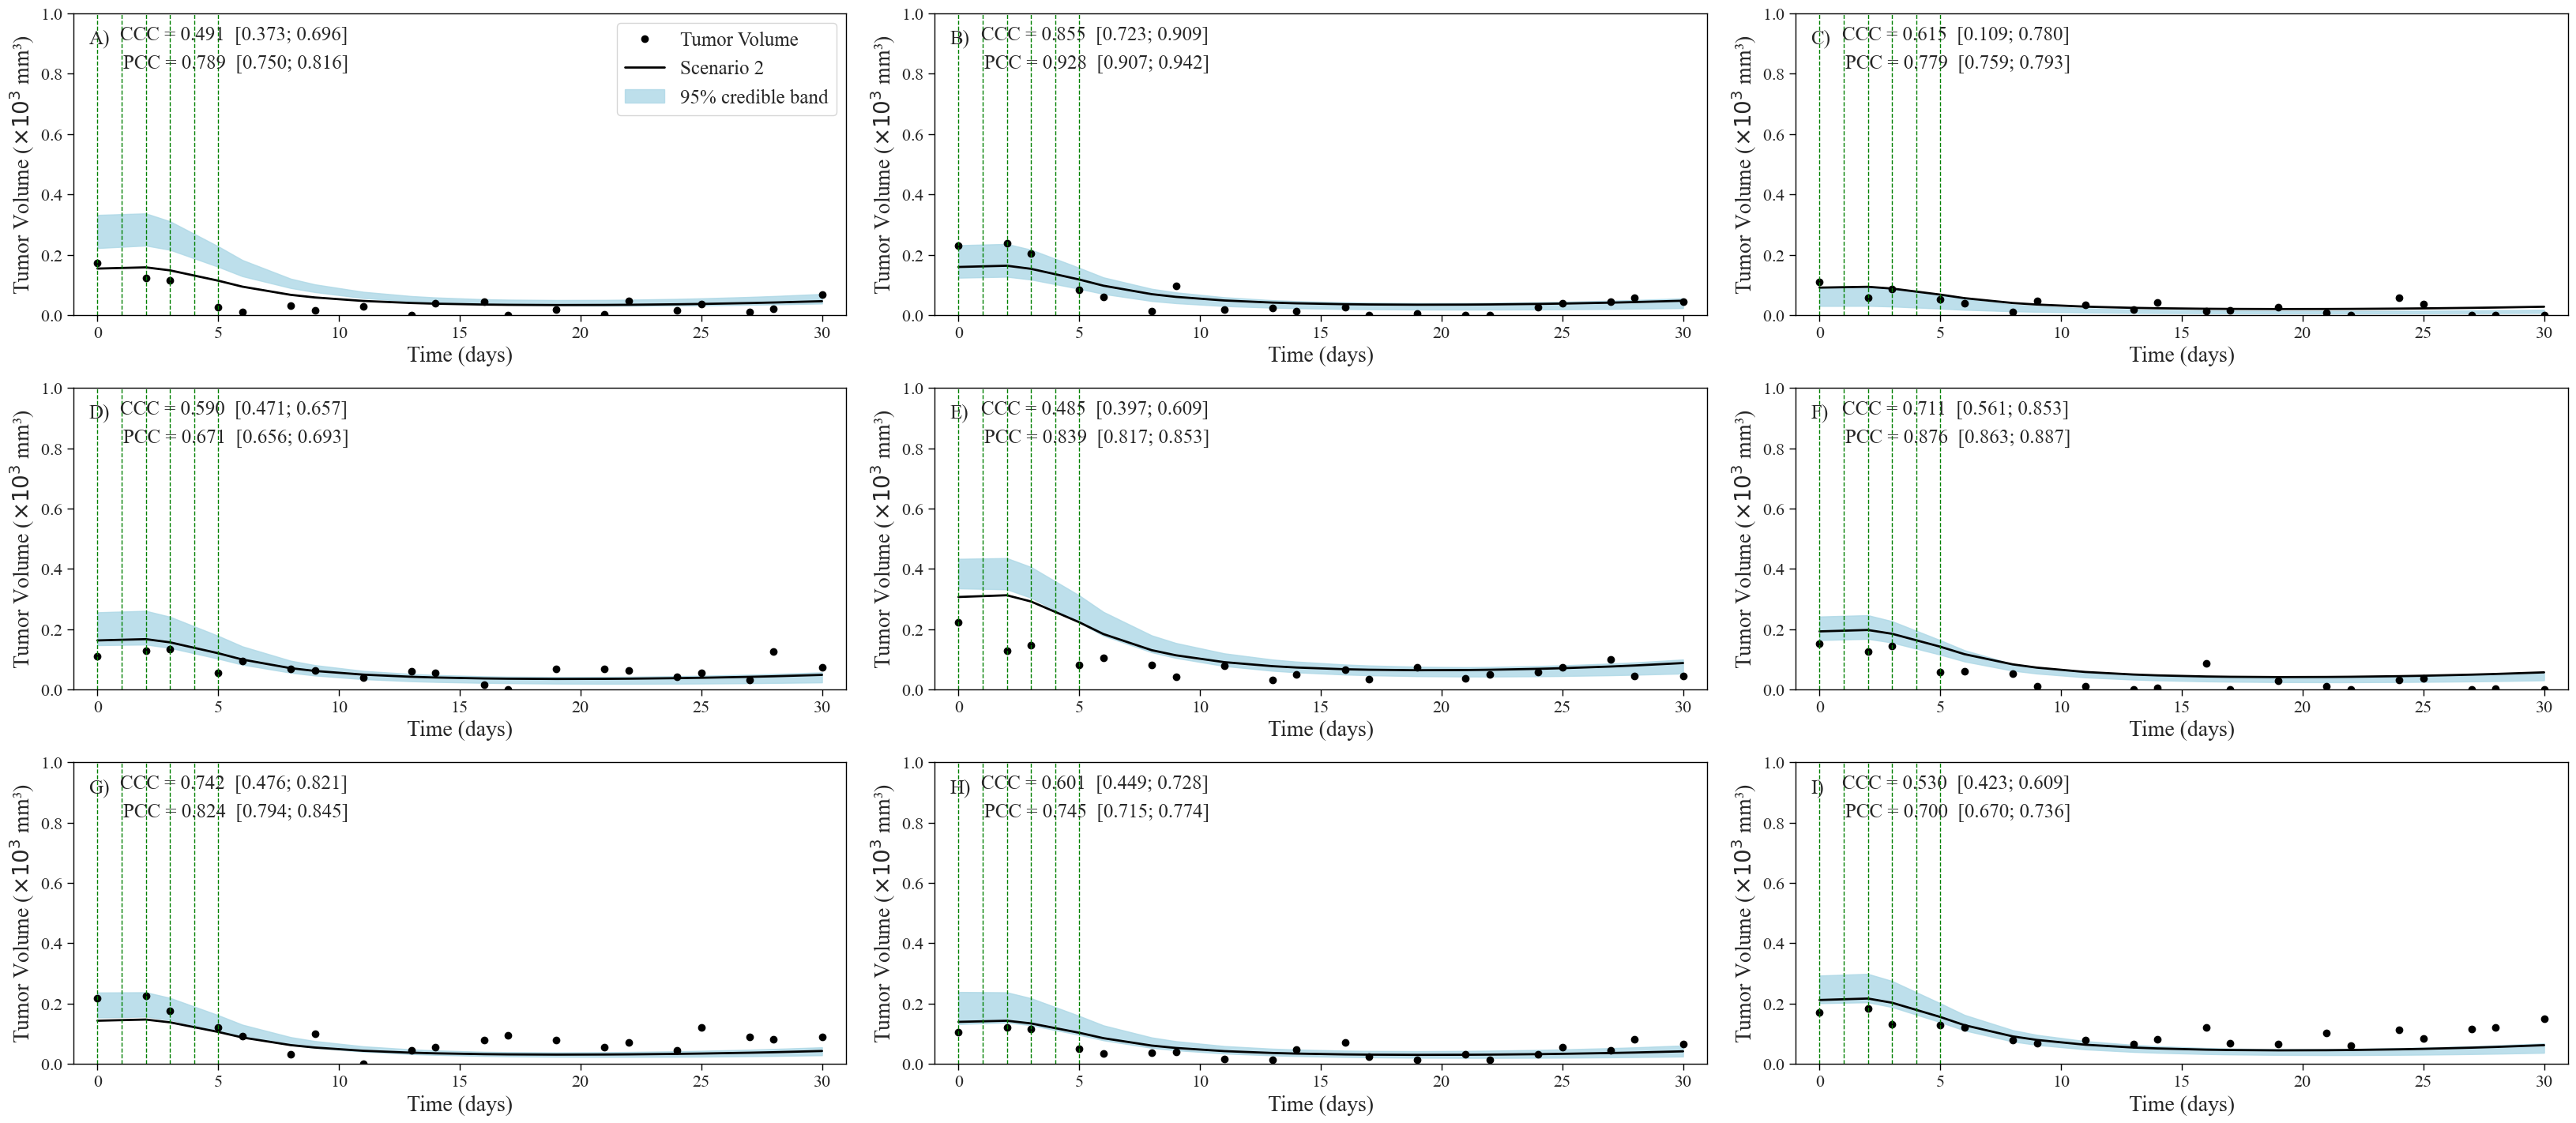

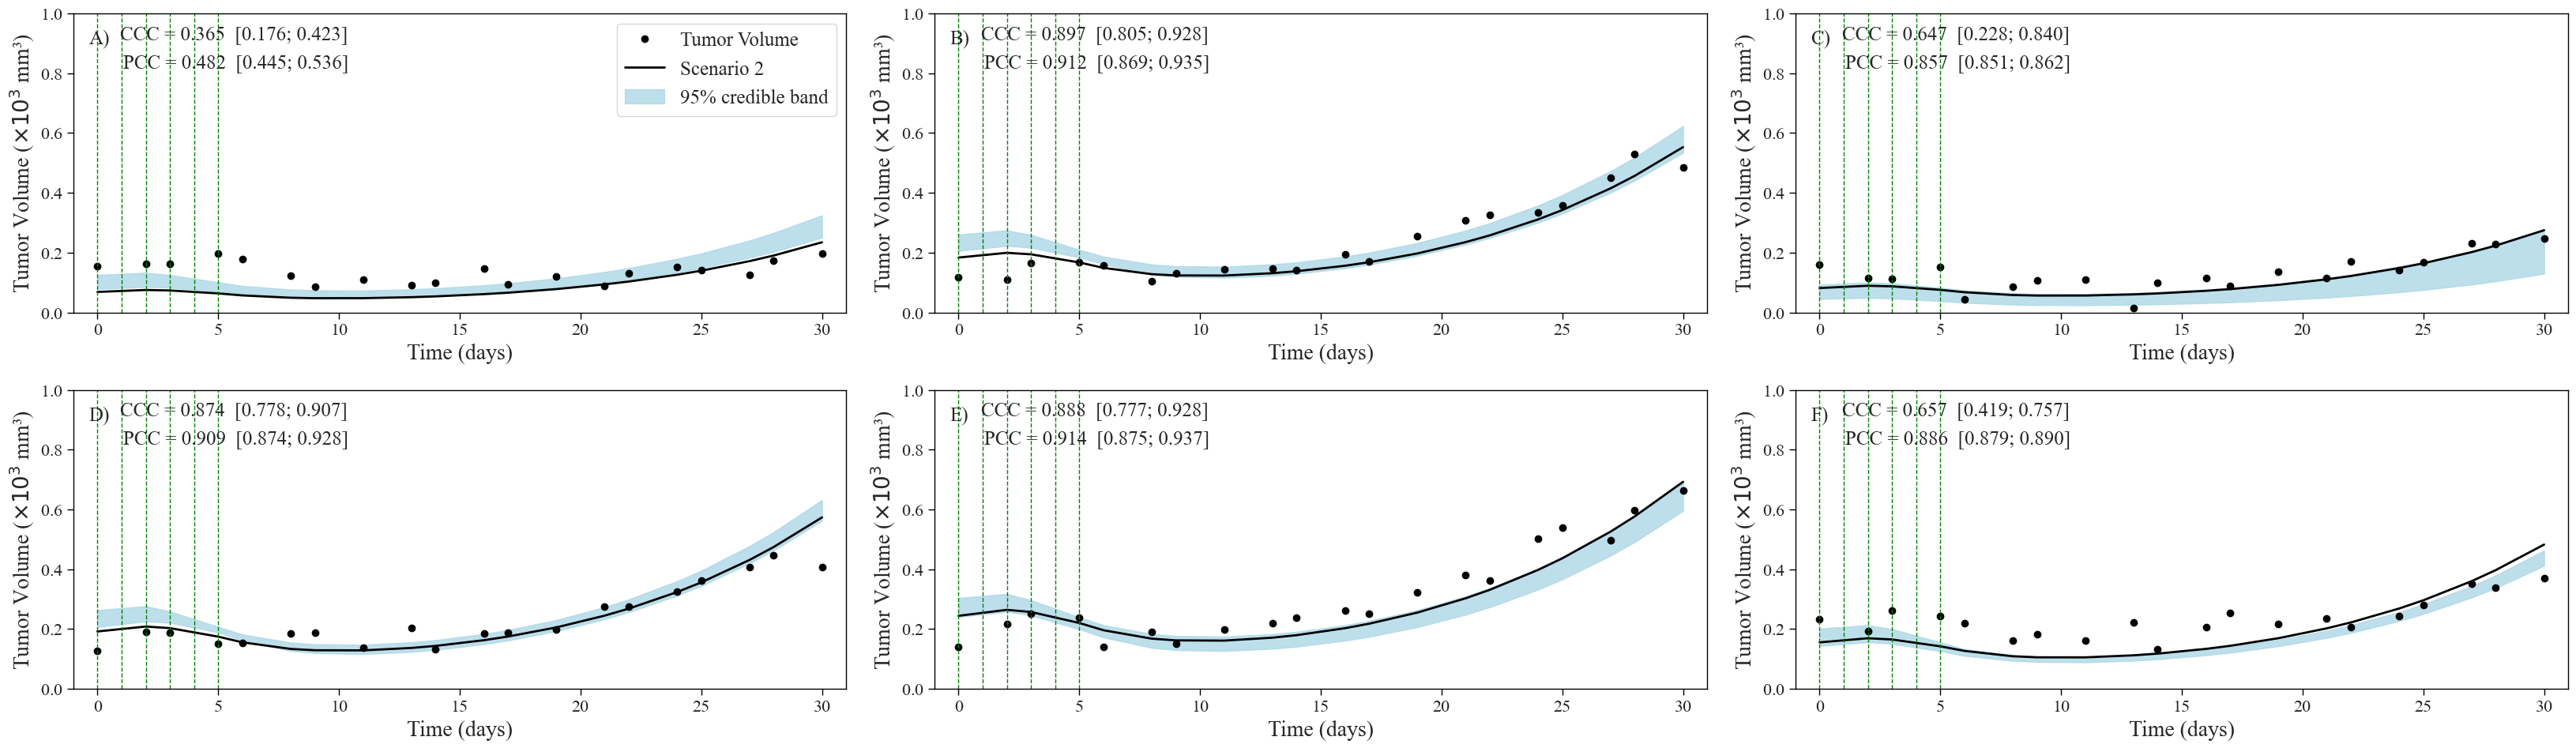

In [ ]:
import os
import pandas as pd
import glob
import math
import emcee
import string
import corner
import numpy as np
from tqdm import tqdm
from numba import jit
import concurrent.futures
from multiprocessing import Pool
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec 
from scipy.integrate import odeint
import seaborn as sns
# import scipy.stats as stats
import sys
import random
import scipy.stats
from matplotlib.ticker import ScalarFormatter
class ScalarFormatterWithDecimals(ScalarFormatter):
    def _set_format(self):
        self.format = '%.1f'

# Find and sort all text files in the ./data directory
data_files = sorted(glob.glob("./data/*.txt"))

# Dictionary to store the parsed data, grouped by data type
full_data = {}

# Loop through each file in the data_files list
for file in data_files:
    # Extract the data type (treatment and cell type) from the file name
    data_type = os.path.basename(file).split('/')[-1].split('_c')[0]
    
    # Extract the mouse name (cohort identifier) from the file name
    mouse_name = 'c' + file.split('/')[-1].split('_c')[-1].split('_t')[0]
    
    # Extract the treatment days from the file name (as integers)
    t_days = np.array([int(t) for t in file.split('/')[-1].split('_c')[-1].split('.txt')[0].split('_t')[1:]])
    
    # Load the measurement data from the file (time, tumor volume)
    data = np.loadtxt(file)
    
    # Extract the specific treatment from the data type (e.g., radiation or control)
    treatment = os.path.basename(data_type).split('_')[0]
    
    # If this data type hasn't been seen before, create a new list in full_data
    if data_type not in full_data:
        full_data[data_type] = []
    
    # Append the mouse's data (including name, tumor measurements, treatment, and treatment days) to the appropriate group
    full_data[data_type].append({
        'name': mouse_name,
        'data': data,
        'treatment': treatment,
        'treatment_days': t_days
    })

# Concordance Correlation Coefficient
def ccc(x, y):
    """
    Calculate the Concordance Correlation Coefficient (CCC).

    Parameters:
    - x, y: Input data arrays

    Returns:
    - CCC value
    """
    x, y = np.asarray(x), np.asarray(y)
    
    if len(x) != len(y):
        raise ValueError("Input arrays must have the same length")
    
    if x.size == 0 or y.size == 0:
        raise ValueError("Input arrays must not be empty")
    
    mean_x, mean_y = np.mean(x), np.mean(y)
    var_x, var_y = np.var(x), np.var(y)
    
    if var_x == 0 or var_y == 0:
        raise ValueError("Input arrays must not have zero variance")
    
    covariance = np.cov(x, y, bias=True)[0, 1]
    ccc_value = (2 * covariance) / (var_x + var_y + (mean_x - mean_y) ** 2)
    
    return ccc_value

# Pearson Correlation Coefficient
def pcc(x, y):
    """
    Calculate the Pearson Correlation Coefficient (PCC).

    Parameters:
    - x, y: Input data arrays

    Returns:
    - PCC value
    """
    x, y = np.asarray(x), np.asarray(y)
    
    if len(x) != len(y):
        raise ValueError("Input arrays must have the same length")
    
    if x.size == 0 or y.size == 0:
        raise ValueError("Input arrays must not be empty")
    
    mean_x, mean_y = np.mean(x), np.mean(y)
    std_x, std_y = np.std(x), np.std(y)
    
    if std_x == 0 or std_y == 0:
        raise ValueError("Input arrays must not have zero variance")
    
    covariance = np.cov(x, y, bias=True)[0, 1]
    pcc_value = covariance / (std_x * std_y)
    
    return pcc_value

# Normalized Root Mean Squared Error
def nrmse(actual, pred): 
    """
    Calculate the Normalized Root Mean Squared Error (NRMSE).

    Parameters:
    - actual: Actual values
    - pred: Predicted values

    Returns:
    - NRMSE value
    """
    actual, pred = np.asarray(actual), np.asarray(pred)
    
    if len(actual) != len(pred):
        raise ValueError("Input arrays must have the same length")
    
    if actual.size == 0 or pred.size == 0:
        raise ValueError("Input arrays must not be empty")
    
    rmse = np.sqrt(np.mean((actual - pred)**2))
    nrmse_value = rmse / np.mean(actual) * 100
    
    return nrmse_value

# Mean Absolute Percentage Error
def mape(pred, actual): 
    """
    Calculate the Mean Absolute Percentage Error (MAPE).

    Parameters:
    - actual: Actual values
    - pred: Predicted values

    Returns:
    - MAPE value
    """
    actual, pred = np.asarray(actual), np.asarray(pred)
    
    if len(actual) != len(pred):
        raise ValueError("Input arrays must have the same length")
    
    if actual.size == 0 or pred.size == 0:
        raise ValueError("Input arrays must not be empty")
    
    if np.any(actual == 0):
        raise ValueError("Actual values must not contain zeros")
    
    mape_value = np.mean(np.abs((actual - pred) / actual)) * 100
    
    return mape_value

def summarize_posterior(arr, alpha=0.05):
    arr = np.asarray(arr, dtype=float)
    med = np.median(arr)
    lo, hi = np.percentile(arr, [100*alpha/2, 100*(1-alpha/2)])
    return med, lo, hi

@jit(nopython=True)
def model_ExponentialDecayDelay(y, t, growth_rate, carrying_capacity, a_radiation, b_radiation, delay, tau_radiation, dose_schedule):

    tumor = y
    tumor_volume = growth_rate * tumor * (1 - tumor / carrying_capacity)

    treatment_effect = 0
    for dose, tau in zip(dose_schedule, tau_radiation):
        if t >= tau + delay: 
            treatment_effect += a_radiation * dose * np.exp(-b_radiation * (t - tau - delay))

    tumor_volume -= treatment_effect * tumor 

    return tumor_volume

def solve_model(model_extension, time_array, parameters, initial_condition, treatment_days, dose, type_sol='data'):
    model_func = model_ExponentialDecayDelay

    growth_rate, carrying_capacity, alpha, beta, delta = parameters

    tau_radiation = treatment_days
    dose_schedule = [dose] * len(tau_radiation)

    if type_sol == 'smooth':
        bgn_p = round(time_array[0], 1)
        end_p = round(time_array[-1], 1)
        time_array = np.linspace(bgn_p, end_p, int((end_p - bgn_p) / 0.1) + 1)
        sol = odeint(model_func, y0=[initial_condition], t=time_array,
                     args=(growth_rate, carrying_capacity, alpha, beta, delta, tau_radiation, dose_schedule),
                     mxstep=2000)
        return np.column_stack((time_array, sol))
    else:
        return odeint(model_func, y0=[initial_condition], t=time_array,
                      args=(growth_rate, carrying_capacity, alpha, beta, delta, tau_radiation, dose_schedule),
                      mxstep=2000)
    
        
def find_max_time_per_group(full_data):
    max_times = {}

    for group, mice_data in full_data.items():
        max_time = 0

        for mouse in mice_data:
            time_data = mouse['data'][:, 0]  
            max_time_mouse = max(time_data) 

            if max_time_mouse > max_time:
                max_time = max_time_mouse

        max_times[group] = max_time

    return max_times


def analyze_chains_for_groups(chain_files_sensitive, chain_files_resistant, full_data):

    results = {}

    for group, chain_files in zip(['radiation_sensitive', 'radiation_resistant'], 
                                  [chain_files_sensitive, chain_files_resistant]):
        print(f"\nProcessing group: {group}")
        
        group_results = {} 
        
        model_extension = "_ExponentialDecayDelay"  
        rs = 8.89429860e-02  
        rr = 1.15631515e-01 
        carrying_capacity = 3.69671552e+03 
        ndim = len(full_data[group])
        
        for chain_file in chain_files:
            print(f"Reading the chains file: {chain_file}")
            chain_data = np.loadtxt(chain_file)

            selected_indices = random.sample(range(len(chain_data)), 10)
            selected_samples = chain_data[selected_indices, :]

            for idx, mouse_data in enumerate(full_data[group]):
                mouse_name = mouse_data['name']
                data = mouse_data['data']

                num_time_points = len(data[:, 0])
                solution_matrix = np.zeros((len(selected_samples), num_time_points))

                growth_rate = rs if group == 'radiation_sensitive' else rr

                for sample_idx, theta in enumerate(selected_samples):
                    
                    treatment_days = mouse_data['treatment_days']
                    dose = 2.0

                    alpha, beta, delta = theta[:3]
                    initial_conditions = theta[3:-1] 

                    initial_condition = initial_conditions[idx]

                    solution = solve_model(
                    model_extension, 
                    data[:, 0],
                    (growth_rate, carrying_capacity, alpha, beta, delta),
                    initial_condition,
                    treatment_days,
                    dose,
                    type_sol="smooth"
                    )

                    mask = np.isin(solution[:, 0], data[:, 0])
                    selected_solution = solution[mask]

                    matched_solution_volumes = selected_solution[:, 1]

                    solution_matrix[sample_idx, :] = matched_solution_volumes

                group_results[mouse_name] = solution_matrix

        results[group] = group_results

    return results

chain_files_sensitive = [
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV2.gz',
]

chain_files_resistant = [
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz'
]

results = analyze_chains_for_groups(chain_files_sensitive, chain_files_resistant, full_data)


def summarize_solutions_with_ci(results):

    summarized = {}
    for grp, mice in results.items():
        summarized[grp] = {}
        for mouse, mtx in mice.items():     
            mean = mtx.mean(axis=0)
            p_lo, p_hi = np.percentile(mtx, [2.5, 97.5], axis=0)
            summarized[grp][mouse] = {
                'mean': mean,
                'ci_positive': p_hi,
                'ci_negative': p_lo
            }
    return summarized

summarized_results1 = summarize_solutions_with_ci(results)

def configure_plot_settings(fontsize):
    plt.rcParams['font.size'] = fontsize
    formatter = mticker.ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((-3, 2))
    return formatter


def finalize_plot(fig, axes, nScenarios, nCols, nRows, full_exp, full_model, save, show, figure_name, formatter):
    final_exp = np.concatenate(full_exp, axis=0) if full_exp else np.array([])
    final_model = np.concatenate(full_model, axis=0) if full_model else np.array([])

    if final_exp.size == 0 or final_model.size == 0:
        print("Error: One of the final arrays is empty.")
        return

    rounded_max = math.ceil(np.max(np.concatenate([final_exp, final_model])) / 1000) * 1000
    for ax in axes[:nScenarios]:
        ax.set_ylim((0, rounded_max))
        ax.yaxis.set_major_formatter(formatter)
    for i in range(nScenarios, nRows * nCols):
        fig.delaxes(axes[i])
    if save:

        plt.savefig(figure_name + '.png', dpi=300, bbox_inches='tight', pad_inches=0.02)
    if show:
        plt.show()
    else:
        plt.close()


def posterior_corr_from_chain(chain_path, model_extension, full_data, group,
                                n_samp=200, seed=42):
    if not os.path.exists(chain_path):
        print(f"[ERROR] Chain not found: {chain_path}")
        return None
    chain = np.loadtxt(chain_path)
    if chain.ndim == 1:
        chain = chain.reshape(1, -1)
    ndim = len(full_data[group])
    n_samp = min(n_samp, chain.shape[0])
    rng = np.random.default_rng(seed)
    idx = rng.choice(chain.shape[0], size=n_samp, replace=False)
    thetas = chain[idx, :]

    rs = 8.89429860e-02 
    rr = 1.15631515e-01 
    carrying_capacity = 3.69671552e+03

    growth_rate = rs if group == 'radiation_sensitive' else rr

    ccc_samples, pcc_samples = [], []
    for theta in thetas:
        params = tuple(theta[:-(ndim+1)])
        ics = theta[-(ndim+1):-1]
        full_model, full_exp = [], []
        for i, mouse in enumerate(full_data[group]):
            t    = mouse['data'][:, 0]
            y    = mouse['data'][:, 1]
            treatment_days = mouse['treatment_days']
            sol = solve_model(model_extension, t, (growth_rate, carrying_capacity, *params),
                              ics[i], treatment_days, dose=2.0, type_sol='data')
            if sol.ndim == 2 and sol.shape[1] == 1:
                sol = sol[:, 0]
            full_model.append(sol); full_exp.append(y)
        model_concat = np.concatenate(full_model)
        exp_concat = np.concatenate(full_exp)
        ccc_samples.append(float(np.clip(ccc(model_concat, exp_concat), -1, 1)))
        pcc_samples.append(float(np.clip(pcc(model_concat, exp_concat), -1, 1)))

    ccc_med, ccc_lo, ccc_hi = summarize_posterior(ccc_samples)
    pcc_med, pcc_lo, pcc_hi = summarize_posterior(pcc_samples)
    return {"ccc_summary": (ccc_med, ccc_lo, ccc_hi),
            "pcc_summary": (pcc_med, pcc_lo, pcc_hi)}

res_cs = posterior_corr_from_chain(
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV2.gz',
    '_ExponentialDecayDelay', full_data, 'radiation_sensitive', n_samp=1000, seed=42)

res_cr = posterior_corr_from_chain(
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz',
    '_ExponentialDecayDelay', full_data, 'radiation_resistant', n_samp=1000, seed=42)

ccc_med_cs, ccc_lo_cs, ccc_hi_cs = res_cs["ccc_summary"]
pcc_med_cs, pcc_lo_cs, pcc_hi_cs = res_cs["pcc_summary"]
ccc_med_cr, ccc_lo_cr, ccc_hi_cr = res_cr["ccc_summary"]
pcc_med_cr, pcc_lo_cr, pcc_hi_cr = res_cr["pcc_summary"]

def posterior_corr_per_mouse(chain_path, model_extension, full_data, group,
                             n_samp=200, seed=42):

    if not os.path.exists(chain_path):
        print(f"[ERROR] Chain not found: {chain_path}")
        return None, None

    chain = np.loadtxt(chain_path)
    if chain.ndim == 1:
        chain = chain.reshape(1, -1)

    ndim = len(full_data[group])
    n_samp = min(n_samp, chain.shape[0])
    rng = np.random.default_rng(seed)
    idx = rng.choice(chain.shape[0], size=n_samp, replace=False)
    thetas = chain[idx, :]

    rs = 8.89429860e-02 
    rr = 1.15631515e-01 
    carrying_capacity = 3.69671552e+03  
 
    growth_rate = rs if group == 'radiation_sensitive' else rr

    mouse_names = [m['name'] for m in full_data[group]]
    ccc_samples = {name: [] for name in mouse_names}
    pcc_samples = {name: [] for name in mouse_names}

    for theta in thetas:
        params = tuple(theta[:-(ndim+1)])  
        ics    = theta[-(ndim+1):-1]   

        for i, mouse in enumerate(full_data[group]):
            name = mouse['name']
            t    = mouse['data'][:, 0]
            y    = mouse['data'][:, 1]
            treatment_days = mouse['treatment_days']

            sol = solve_model(model_extension, t, (growth_rate, carrying_capacity, *params),
                              ics[i], treatment_days, dose=2.0, type_sol='data')
            if sol.ndim == 2 and sol.shape[1] == 1:
                sol = sol[:, 0]

            ccc_val = float(np.clip(ccc(sol, y), -1, 1))
            pcc_val = float(np.clip(pcc(sol, y), -1, 1))

            ccc_samples[name].append(ccc_val)
            pcc_samples[name].append(pcc_val)

    ccc_res = {name: summarize_posterior(vals) for name, vals in ccc_samples.items()}
    pcc_res = {name: summarize_posterior(vals) for name, vals in pcc_samples.items()}

    return ccc_res, pcc_res

ccc_cs, pcc_cs = posterior_corr_per_mouse(
    './Output_Calibration/multi_chain_radiation_sensitive_ExponentialDecayDelayV2.gz',
    '_ExponentialDecayDelay', full_data, 'radiation_sensitive', n_samp=1000, seed=42)

ccc_cr, pcc_cr = posterior_corr_per_mouse(
    './Output_Calibration/multi_chain_radiation_resistant_ExponentialDecayDelayV2.gz',
    '_ExponentialDecayDelay', full_data, 'radiation_resistant', n_samp=1000, seed=42)

post_corr = {
    **{f"s_{name}": ccc_cs[name] for name in ccc_cs.keys()},
    **{f"r_{name}": ccc_cr[name] for name in ccc_cr.keys()}
}
post_pcc = {
    **{f"s_{name}": pcc_cs[name] for name in pcc_cs.keys()},
    **{f"r_{name}": pcc_cr[name] for name in pcc_cr.keys()}
}


def plot_maxll_solution_with_deviation_melhor_pior_juntos(
    files_locations_sensitive, 
    files_locations_resistant, 
    summarized_results, 
    full_data, 
    show=True, 
    save=False, 
    fontsize='18', 
    figure_name='maxll_figure'):

    if not show and not save:
        return 

    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif']  = ['Times New Roman']
    formatter = configure_plot_settings(fontsize)
    plt.rcParams['font.size'] = 20

    def get_suffix(file_location):
        return file_location.split('_')[-1].split('.')[0]

    manual_labels = {
        "ExponentialDecayDelayV2": "Scenario 2"
    }

    def load_parameters(files):
        all_theta, all_suffix = [], []
        for file_location in files:
            npzfile = np.load(file_location)
            best_pars = npzfile['pars']
            all_theta.append(best_pars)
            all_suffix.append(get_suffix(file_location))
            print(f"\n{file_location} - Best Parameters:", best_pars)
        return all_theta, all_suffix

    all_theta_sensitive, all_suffix_sensitive = load_parameters(files_locations_sensitive or [])
    all_theta_resistant, all_suffix_resistant = load_parameters(files_locations_resistant or [])

    max_times = find_max_time_per_group(full_data)
    linestyles = ['solid', 'dashed', 'dotted', 'dashdot']
    colors = ['black', 'red', 'green', 'blue', 'cyan']

    def make_figure_for_group(group_name,
                              all_theta,
                              all_suffix,
                              summarized_results,
                              full_data,
                              figure_name_base):

        if len(all_theta) == 0:
            print(f"[WARNING] There are no parameters for the group. {group_name}.")
            return

        if group_name not in full_data:
            print(f"[WARNING] Group {group_name} not found in full_data.")
            return

        theta = all_theta[0]
        suffix = all_suffix[0]
        label_model = manual_labels.get(suffix, f'Model {suffix}')

        mice = full_data[group_name]
        n_mice_total = len(mice)

        width_per_panel = 22 / 2.0   
        height_per_panel = 15 / 3.0 

        if group_name == 'radiation_sensitive':

            nCols, nRows = 3, 3
        else: 

            nCols, nRows = 3, 2

        fig, axes = plt.subplots(
            nRows,
            nCols,
            figsize=(width_per_panel * nCols, height_per_panel * nRows)
        )
        axes = axes.flatten()
        ts_axes = axes 

        max_ts_panels = len(ts_axes)
        n_mice_to_plot = min(n_mice_total, max_ts_panels)

        full_exp_group, full_model_group = [], []

        if group_name == 'radiation_sensitive':
            ccc_dict = ccc_cs
            pcc_dict = pcc_cs
        else:
            ccc_dict = ccc_cr
            pcc_dict = pcc_cr

        ndim = len(mice)

        rs = 8.89429860e-02 
        rr = 1.15631515e-01
        carrying_capacity = 3.69671552e+03 

        for idx in range(n_mice_to_plot):
            mouse_data = mice[idx]
            ax = ts_axes[idx]

            mouse_name = mouse_data['name']
            data = mouse_data['data']
            t = data[:, 0]
            y = data[:, 1]
            treatment_days = mouse_data['treatment_days']

            growth_rate = rs if group_name == 'radiation_sensitive' else rr
            dose = 2.0

            alpha, beta, delta = theta[:3]
            ics = theta[3:-1]      
            initial_condition = ics[idx]

            params = (growth_rate, carrying_capacity, alpha, beta, delta)

            sol = solve_model("_ExponentialDecayDelay", t, params,
                              initial_condition, treatment_days,
                              dose, type_sol="smooth")
            mask = np.isin(sol[:, 0], t)
            sol_times = sol[mask, 0]
            sol_volumes = sol[mask, 1]

            ax.plot(t, y, 'o', color='black', markersize=6, label='Tumor Volume')

            ax.plot(
                sol_times,
                sol_volumes,
                color=colors[0],
                linestyle=linestyles[0],
                linewidth=2,
                label=label_model
            )

            if group_name in summarized_results and mouse_name in summarized_results[group_name]:
                res = summarized_results[group_name][mouse_name]
                ax.fill_between(
                    t,
                    res['ci_positive'],
                    res['ci_negative'],
                    color='lightblue',
                    alpha=0.8,
                    label=r'95% credible band'
                )

            for t_day in treatment_days:
                ax.axvline(x=t_day, color='green', linestyle='--', linewidth=1)

            if mouse_name in ccc_dict:
                ccc_med, ccc_lo, ccc_hi = ccc_dict[mouse_name]
                pcc_med, pcc_lo, pcc_hi = pcc_dict[mouse_name]

                ax.text(
                    0.06, 0.96,
                    f'CCC = {ccc_med:.3f}  [{ccc_lo:.3f}; {ccc_hi:.3f}]',
                    transform=ax.transAxes,
                    fontsize=18,
                    verticalalignment='top'
                )

                ax.text(
                    0.065, 0.865,
                    f'PCC = {pcc_med:.3f}  [{pcc_lo:.3f}; {pcc_hi:.3f}]',
                    transform=ax.transAxes,
                    fontsize=18,
                    verticalalignment='top'
                )

            ax.set_xlabel('Time (days)', fontsize=20)
            ax.set_ylabel(r'Tumor Volume ($\times10^3$ mm³)', fontsize=20)
            ax.set_xlim((-1, max_times[group_name] + 1))
            ax.grid(False)
            ax.ticklabel_format(axis='y', style='scientific',
                                scilimits=(-3, 2), useOffset=False)
            ax.yaxis.get_offset_text().set_visible(False)

            fmt_y = ScalarFormatterWithDecimals(useMathText=True)
            fmt_y.set_scientific(True)
            fmt_y.set_powerlimits((-3, 2))
            ax.yaxis.set_major_formatter(fmt_y)
            ax.yaxis.get_major_formatter().set_scientific(False)
            ax.yaxis.offsetText.set_visible(False)

            full_model_group.append(sol_volumes)
            full_exp_group.append(y)

            if idx == 0:
                ax.legend(loc=1, fontsize=18)

        for j in range(n_mice_to_plot, max_ts_panels):
            fig.delaxes(ts_axes[j])

        for idx in range(n_mice_to_plot):
            ax = ts_axes[idx]
            ax.text(
                0.02, 0.9,
                f'{string.ascii_uppercase[idx]})',
                transform=ax.transAxes,
                fontsize=18
            )
            for spine in ax.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1.0)
            ax.tick_params(axis='both', which='major',
                           length=6, width=1, direction='out',
                           color='black', bottom=True, left=True, labelsize=16)
            ax.minorticks_off()

            ax.ticklabel_format(axis='y', style='scientific',
                                scilimits=(-3, 2), useOffset=False)
            ax.yaxis.offsetText.set_visible(False)

            ax.ticklabel_format(axis='x', style='scientific',
                                scilimits=(-3, 2), useOffset=False)
            ax.xaxis.get_offset_text().set_visible(False)

        fig.tight_layout()
        fig.subplots_adjust(top=0.95)

        if full_exp_group and full_model_group:
            finalize_plot(
                fig,
                ts_axes,
                nScenarios=n_mice_to_plot,
                nCols=nCols,
                nRows=nRows,
                full_exp=full_exp_group,
                full_model=full_model_group,
                save=save,
                show=show,
                figure_name=figure_name_base,
                formatter=formatter
            )
        else:
            if save:
                fig.savefig(
                    figure_name_base + '.png',
                    dpi=300, bbox_inches='tight', pad_inches=0.02
                )
            if show:
                plt.show()
            else:
                plt.close(fig)

    make_figure_for_group(
        group_name='radiation_sensitive',
        all_theta=all_theta_sensitive,
        all_suffix=all_suffix_sensitive,
        summarized_results=summarized_results,
        full_data=full_data,
        figure_name_base=figure_name + '_sensitive'
    )

    make_figure_for_group(
        group_name='radiation_resistant',
        all_theta=all_theta_resistant,
        all_suffix=all_suffix_resistant,
        summarized_results=summarized_results,
        full_data=full_data,
        figure_name_base=figure_name + '_resistant'
    )

    return


plot_maxll_solution_with_deviation_melhor_pior_juntos(
    files_locations_sensitive=[
        './Output_Calibration/multi_ll_pars_radiation_sensitive_ExponentialDecayDelayV2.npz'
    ],
    files_locations_resistant=[
        './Output_Calibration/multi_ll_pars_radiation_resistant_ExponentialDecayDelayV2.npz'
    ],
    summarized_results=summarized_results1, 
    full_data=full_data,                    
    show=True,
    save=False,
    figure_name='all_figures' 
)

# BIC

In [13]:
import os
import pandas as pd
import glob
import math
import emcee
import string
import corner
import numpy as np
from tqdm import tqdm
from numba import jit
import concurrent.futures
from multiprocessing import Pool
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
from scipy.integrate import odeint
import seaborn as sns
import scipy.stats as stats
import sys
import random

# Find and sort all text files in the ./data directory
data_files = sorted(glob.glob("./data/*.txt"))

# Dictionary to store the parsed data, grouped by data type
full_data = {}

# Loop through each file in the data_files list
for file in data_files:
    # Extract the data type (treatment and cell type) from the file name
    data_type = os.path.basename(file).split('/')[-1].split('_c')[0]
    
    # Extract the mouse name (cohort identifier) from the file name
    mouse_name = 'c' + file.split('/')[-1].split('_c')[-1].split('_t')[0]
    
    # Extract the treatment days from the file name (as integers)
    t_days = np.array([int(t) for t in file.split('/')[-1].split('_c')[-1].split('.txt')[0].split('_t')[1:]])
    
    # Load the measurement data from the file (time, tumor volume)
    data = np.loadtxt(file)
    
    # Extract the specific treatment from the data type (e.g., radiation or control)
    treatment = os.path.basename(data_type).split('_')[0]
    
    # If this data type hasn't been seen before, create a new list in full_data
    if data_type not in full_data:
        full_data[data_type] = []
    
    # Append the mouse's data (including name, tumor measurements, treatment, and treatment days) to the appropriate group
    full_data[data_type].append({
        'name': mouse_name,
        'data': data,
        'treatment': treatment,
        'treatment_days': t_days
    })

def calculate_n_total(full_data, group):
    n_total = 0
    for mouse_data in full_data[group]:
        n_total += len(mouse_data['data'])
    return n_total

all_models = [
    '_ExponentialDecayDelayV1',
    '_ExponentialDecayDelayV2',
    '_ExponentialDecayDelayV3',
    '_ExponentialDecayDelayV4',
    '_ExponentialDecayDelayV5',
    '_ExponentialDecayDelayV6',
    '_ExponentialDecayDelayV7',
    '_ExponentialDecayDelayV8'
]

group_ll_total = {'radiation_sensitive': {}, 'radiation_resistant': {}}
group_params_total = {'radiation_sensitive': {}, 'radiation_resistant': {}}
group_obs_total = {'radiation_sensitive': 0, 'radiation_resistant': 0}

group_bic = {'radiation_sensitive': {}, 'radiation_resistant': {}}

for model in all_models:
    for group in group_ll_total:
        group_ll_total[group][model] = 0
        group_params_total[group][model] = 0
        group_bic[group][model] = np.nan

for group in ['radiation_sensitive', 'radiation_resistant']:
    n_total = calculate_n_total(full_data, group)
    group_obs_total[group] = n_total 

    for model in all_models:
        files_location = f'./Output_Calibration/multi_ll_pars_{group}{model}.npz'
        npzfile = np.load(files_location)

        max_ll = npzfile['max_ll']        
        theta = npzfile['pars']
        k = len(theta) 

        group_ll_total[group][model] = max_ll
        group_params_total[group][model] = k

        if n_total > 0:
            bic_global = k * np.log(n_total) - 2 * max_ll
        else:
            bic_global = np.nan
        
        group_bic[group][model] = bic_global

print("% --- BIC ---")
header = "group & " + " & ".join([model.replace('_', '') for model in all_models]) + " \\\\ \\hline"
print(header)

for group in ['radiation_sensitive', 'radiation_resistant']:
    row_text = f"{group} "
    n_total = group_obs_total[group]
    for model in all_models:
        bic_global = group_bic[group][model]
        row_text += f"& {bic_global:.2f} "
    print(row_text + "\\\\ \\hline")

print("\n% --- WBIC (BIC weights) ---")
header_wbic = "group & " + " & ".join([model.replace('_', '') for model in all_models]) + " \\\\ \\hline"
print(header_wbic)

for group in ['radiation_sensitive', 'radiation_resistant']:
    bics = np.array([group_bic[group][model] for model in all_models], dtype=float)

    mask = ~np.isnan(bics)
    bics_valid = bics[mask]

    if bics_valid.size == 0:

        weights = np.full_like(bics, np.nan)
    else:
        delta = bics_valid - np.min(bics_valid)

        w_unnorm = np.exp(-0.5 * delta)

        w_norm = w_unnorm / np.sum(w_unnorm)

        weights = np.full_like(bics, np.nan, dtype=float)
        weights[mask] = w_norm

    row_text = f"{group} "
    for w in weights:
        if np.isnan(w):
            row_text += "& --- "
        else:
            row_text += f"& {w:.3f} "
    print(row_text + "\\\\ \\hline")


% --- BIC ---
group & ExponentialDecayDelayV1 & ExponentialDecayDelayV2 & ExponentialDecayDelayV3 & ExponentialDecayDelayV4 & ExponentialDecayDelayV5 & ExponentialDecayDelayV6 & ExponentialDecayDelayV7 & ExponentialDecayDelayV8 \\ \hline
radiation_sensitive & 6332.27 & 5284.49 & 6082.92 & 6097.30 & 5902.28 & 6071.05 & 6311.38 & 6141.74 \\ \hline
radiation_resistant & 6291.41 & 5243.62 & 6042.06 & 6056.44 & 5861.41 & 6030.19 & 6270.52 & 6100.88 \\ \hline

% --- WBIC (BIC weights) ---
group & ExponentialDecayDelayV1 & ExponentialDecayDelayV2 & ExponentialDecayDelayV3 & ExponentialDecayDelayV4 & ExponentialDecayDelayV5 & ExponentialDecayDelayV6 & ExponentialDecayDelayV7 & ExponentialDecayDelayV8 \\ \hline
radiation_sensitive & 0.000 & 1.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ \hline
radiation_resistant & 0.000 & 1.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ \hline
